### Avance 1: Carga y transformación de los datos


In [17]:
import pandas as pd
import numpy as np

#### Se carga el archivo csv

In [19]:
datos = pd.read_csv('data_latinoamerica.csv')

#### Se muestran las primeras 10 filas del dataset

In [20]:
datos.head(10) 

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
5,AR,2020-01-06,AR,Argentina,9.0,0.0,41.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
6,AR,2020-01-07,AR,Argentina,4.0,0.0,45.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
7,AR,2020-01-08,AR,Argentina,3.0,0.0,48.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
8,AR,2020-01-09,AR,Argentina,0.0,0.0,48.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
9,AR,2020-01-10,AR,Argentina,1.0,0.0,49.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


#### Se muestra la cantidad de filas y columnas 

In [21]:
datos.shape

(12216057, 50)

#### Se seleccionan los paises de interes de la columna country name

In [22]:
datos['country_name'].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Peru', 'Puerto Rico',
       'Paraguay', 'El Salvador', 'Uruguay', 'Venezuela'], dtype=object)

In [91]:
paises_interes = ('Argentina', 'Chile', 'Mexico', 'Peru', 'Colombia', 'Brazil')

In [24]:
datos_paises_interes = datos[datos ['country_name'].isin (paises_interes)]

In [25]:
datos_paises_interes.shape

(11970289, 50)

In [26]:
datos_paises_interes['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

#### Dado que hay diferentes regiones por país solo se selecciona el acumulado

In [27]:
datos_paises_interes = datos_paises_interes[datos_paises_interes ['location_key'].isin ([ 'AR', 'CL', 'MX', 'PE', 'CO','BR'])]

In [28]:
datos_paises_interes.shape

(5946, 50)

In [29]:
datos_paises_interes = datos_paises_interes[datos_paises_interes ['date'] >=  '2021-01-01']

In [30]:
datos_paises_interes.shape

(3750, 50)

#### Se procede a limpiar los datos y a reemplazar los valores nulos

In [31]:
datos_paises_interes = datos_paises_interes.dropna(axis=0, how='all' )
datos_paises_interes = datos_paises_interes.dropna(axis=1, how='all' )

In [32]:
datos_paises_interes.shape

(3750, 50)

In [33]:
datos_paises_interes.isnull().sum()

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

#### Se decide eliminar las columnas new_recovered y cumulative_recovered ya que los valores nulos representan un porcentaje muy alto del total de registros. 

In [34]:
datos_paises_interes = datos_paises_interes.drop(columns=['new_recovered', 'cumulative_recovered'])

In [35]:
datos_paises_interes.shape

(3750, 48)

In [36]:
datos_paises_interes.head(10)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
366,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,0.000000,41.559285,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
367,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,0.000000,43.581350,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
368,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,13.144500,74.880846,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
369,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,1.498600,60.805923,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
370,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,8.286750,72.972595,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
371,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,5.108222,52.241997,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
372,AR,2021-01-07,AR,Argentina,13722.0,160.0,1731824.0,47453.0,42092.0,44938712.0,...,0.000000,39.691672,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
373,AR,2021-01-08,AR,Argentina,13932.0,162.0,1745756.0,47615.0,54090.0,44938712.0,...,3.265714,57.254261,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
374,AR,2021-01-09,AR,Argentina,9959.0,158.0,1755715.0,47773.0,58552.0,44938712.0,...,13.687778,61.715447,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
375,AR,2021-01-10,AR,Argentina,5174.0,165.0,1760889.0,47938.0,59043.0,44938712.0,...,0.000000,62.971625,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8


In [37]:
datos_paises_interes.describe()

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,3729.000000,3729.000000,3.729000e+03,3729.000000,3.161000e+03,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03,...,3660.000000,3708.000000,3.750000e+03,3.750000e+03,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,13924.598284,277.300885,6.777284e+06,192974.495307,7.751506e+07,7.772147e+07,3.787035e+07,3.927162e+07,1.255498e+07,6.833931e+07,...,1.442951,62.293617,1.443888e+07,2.636580e+06,59502.500000,76.808500,154.274667,81.428000,36.566667,14.816667
std,24258.010004,508.206954,7.995728e+06,182936.954037,9.588437e+07,6.713774e+07,3.318493e+07,3.448406e+07,1.008074e+07,5.829528e+07,...,4.341364,15.857753,5.710076e+06,2.584740e+06,45125.310561,1.597394,27.000140,11.800621,13.027566,1.665972
min,-573.000000,0.000000,9.710000e+02,1.000000,1.800000e+01,1.757400e+07,8.972014e+06,8.601989e+06,2.341903e+06,1.661014e+07,...,0.000000,10.296407,6.723516e+06,7.094180e+05,12027.000000,74.992000,107.669000,59.035000,25.300000,12.400000
25%,1531.000000,26.000000,2.125355e+06,59146.000000,1.562498e+07,2.938188e+07,1.445076e+07,1.493113e+07,3.599141e+06,2.539034e+07,...,0.000000,51.921881,1.055471e+07,1.090598e+06,16425.000000,75.672000,146.370000,77.999000,26.600000,12.600000
50%,5164.000000,100.000000,3.629796e+06,139621.000000,4.223210e+07,4.791080e+07,2.225416e+07,2.324582e+07,8.316128e+06,4.108344e+07,...,0.000000,65.271935,1.291832e+07,1.543881e+06,45582.000000,76.518000,149.351000,82.149000,33.300000,15.750000
75%,14911.000000,314.000000,6.223497e+06,215028.000000,8.267872e+07,1.109920e+08,5.485523e+07,5.748131e+07,2.494867e+07,1.026269e+08,...,0.338667,74.385480,2.167191e+07,2.690269e+06,102418.000000,77.109000,184.379000,91.421000,37.000000,15.800000
max,298408.000000,11447.000000,3.456883e+07,685203.000000,3.478685e+08,2.125594e+08,1.044358e+08,1.081236e+08,2.780789e+07,1.832416e+08,...,46.736000,94.817706,2.184651e+07,8.241430e+06,134981.000000,80.042000,188.528000,95.815000,63.900000,16.600000


#### Los demás nulos se proceden a rellenar con promedios o fila siguiente según las características de la columna 

In [38]:
for pais in paises_interes:
    datos_paises_interes[ 'new_confirmed'] = datos_paises_interes[ 'new_confirmed'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['new_confirmed'].mean())
    datos_paises_interes['new_deceased'] = datos_paises_interes['new_deceased'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['new_deceased'].mean())
    datos_paises_interes['cumulative_confirmed'] = datos_paises_interes['cumulative_confirmed'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['cumulative_confirmed'].ffill())
    datos_paises_interes['cumulative_deceased'] = datos_paises_interes['cumulative_deceased'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['cumulative_deceased'].ffill())
    datos_paises_interes['cumulative_vaccine_doses_administered'] = datos_paises_interes['cumulative_vaccine_doses_administered'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['cumulative_vaccine_doses_administered'].ffill())
    datos_paises_interes['average_temperature_celsius'] = datos_paises_interes['average_temperature_celsius'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['average_temperature_celsius'].ffill())
    datos_paises_interes['minimum_temperature_celsius'] = datos_paises_interes['minimum_temperature_celsius'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['minimum_temperature_celsius'].ffill())
    datos_paises_interes['maximum_temperature_celsius'] = datos_paises_interes['maximum_temperature_celsius'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['maximum_temperature_celsius'].ffill())
    datos_paises_interes['rainfall_mm'] = datos_paises_interes['rainfall_mm'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['rainfall_mm'].ffill())
    datos_paises_interes['relative_humidity'] = datos_paises_interes['relative_humidity'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['relative_humidity'].ffill())
    

In [39]:
datos_paises_interes.isnull().sum()

location_key                               0
date                                       0
country_code                               0
country_name                               0
new_confirmed                              0
new_deceased                               0
cumulative_confirmed                       0
cumulative_deceased                        0
cumulative_vaccine_doses_administered    108
population                                 0
population_male                            0
population_female                          0
population_rural                           0
population_urban                           0
population_density                         0
human_development_index                    0
population_age_00_09                       0
population_age_10_19                       0
population_age_20_29                       0
population_age_30_39                       0
population_age_40_49                       0
population_age_50_59                       0
population

#### Dado que la columna cumulative_vaccine_doses_administered aún presenta nulos se procede a rellenar con el valor anterior

In [40]:
for pais in paises_interes:
    datos_paises_interes['cumulative_vaccine_doses_administered'] = datos_paises_interes['cumulative_vaccine_doses_administered'].fillna(datos_paises_interes[datos_paises_interes['country_name'] == pais]['cumulative_vaccine_doses_administered'].bfill())

In [41]:
datos_paises_interes.isnull().sum()

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

#### Con las columnas ya rellenadas se procede a guardar el archivo nuevo

In [42]:
datos_paises_interes.to_csv('datos_paises_interes.csv', index=False)

In [43]:
datos_paises_interes = pd.read_csv('datos_paises_interes.csv')

In [44]:
datos_paises_interes.head(10)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,0.000000,41.559285,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
1,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,0.000000,43.581350,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
2,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,13.144500,74.880846,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
3,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,1.498600,60.805923,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
4,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,8.286750,72.972595,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
5,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,5.108222,52.241997,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
6,AR,2021-01-07,AR,Argentina,13722.0,160.0,1731824.0,47453.0,42092.0,44938712.0,...,0.000000,39.691672,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
7,AR,2021-01-08,AR,Argentina,13932.0,162.0,1745756.0,47615.0,54090.0,44938712.0,...,3.265714,57.254261,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
8,AR,2021-01-09,AR,Argentina,9959.0,158.0,1755715.0,47773.0,58552.0,44938712.0,...,13.687778,61.715447,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
9,AR,2021-01-10,AR,Argentina,5174.0,165.0,1760889.0,47938.0,59043.0,44938712.0,...,0.000000,62.971625,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8


#### Se generan para todas las variables númericas las métricas de estadística descriptiva

In [45]:
for variable in datos_paises_interes.columns:
    if datos_paises_interes[variable].dtype == 'int64' or datos_paises_interes[variable].dtype == 'float64':
        print(f"La mediana de {variable} es: {datos_paises_interes[variable].median()}")
        print(f"La variancia de {variable} es: {datos_paises_interes[variable].var()}")
        print(f"El valor minimo de {variable} es: {datos_paises_interes[variable].min()}")
        print(f"El valor maximo de {variable} es: {datos_paises_interes[variable].max()}")
        print(f"El rango de {variable} es: {datos_paises_interes[variable].max() - datos_paises_interes[variable].min()}")
        print(f"El promedio de {variable} es: {datos_paises_interes[variable].mean()}")
        print(f"La desviacion estandar de {variable} es: {datos_paises_interes[variable].std()}")
        print("-------"*10)

La mediana de new_confirmed es: 5221.5
La variancia de new_confirmed es: 585160750.1670985
El valor minimo de new_confirmed es: -573.0
El valor maximo de new_confirmed es: 298408.0
El rango de new_confirmed es: 298981.0
El promedio de new_confirmed es: 13918.83207342995
La desviacion estandar de new_confirmed es: 24190.09611735965
----------------------------------------------------------------------
La mediana de new_deceased es: 102.0
La variancia de new_deceased es: 256941.35128844946
El valor minimo de new_deceased es: 0.0
El valor maximo de new_deceased es: 11447.0
El rango de new_deceased es: 11447.0
El promedio de new_deceased es: 276.50057326892113
La desviacion estandar de new_deceased es: 506.8938264453903
----------------------------------------------------------------------
La mediana de cumulative_confirmed es: 3640785.5
La variancia de cumulative_confirmed es: 64019086123943.49
El valor minimo de cumulative_confirmed es: 971.0
El valor maximo de cumulative_confirmed es: 3

Estas estadísticas son cruciales para entender la escala de los datos y la variabilidad 
de la pandemia y a las características de los países.

### Avance 2: Análisis Exploratorio y Visualización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos_paises_interes = pd.read_csv('datos_paises_interes.csv')

In [3]:
datos_paises_interes.head(10)


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,0.000000,41.559285,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
1,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,0.000000,43.581350,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
2,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,13.144500,74.880846,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
3,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,1.498600,60.805923,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
4,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,8.286750,72.972595,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
5,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,5.108222,52.241997,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
6,AR,2021-01-07,AR,Argentina,13722.0,160.0,1731824.0,47453.0,42092.0,44938712.0,...,0.000000,39.691672,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
7,AR,2021-01-08,AR,Argentina,13932.0,162.0,1745756.0,47615.0,54090.0,44938712.0,...,3.265714,57.254261,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
8,AR,2021-01-09,AR,Argentina,9959.0,158.0,1755715.0,47773.0,58552.0,44938712.0,...,13.687778,61.715447,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
9,AR,2021-01-10,AR,Argentina,5174.0,165.0,1760889.0,47938.0,59043.0,44938712.0,...,0.000000,62.971625,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8


In [4]:
print(datos_paises_interes.groupby('country_name').describe())

             new_confirmed                                              \
                     count          mean           std    min      25%   
country_name                                                             
Argentina            625.0  12894.917874  23508.795780    0.0   1239.0   
Brazil               625.0  43069.839737  39555.782092 -573.0  14314.0   
Chile                625.0   6148.639474   6809.363543  273.0   1932.0   
Colombia             625.0   7438.746674   9225.670055    0.0    365.0   
Mexico               625.0   8885.231606  12005.345352  192.0   2116.0   
Peru                 625.0   5075.617074   8018.170303    0.0    944.0   

                                              new_deceased              ...  \
                  50%           75%       max        count        mean  ...   
country_name                                                            ...   
Argentina      5205.0  14269.000000  174174.0        625.0  134.388084  ...   
Brazil        323

Se crea una matriz de correlaciones para comparar las variables

In [79]:
sns.set_theme(style="whitegrid")

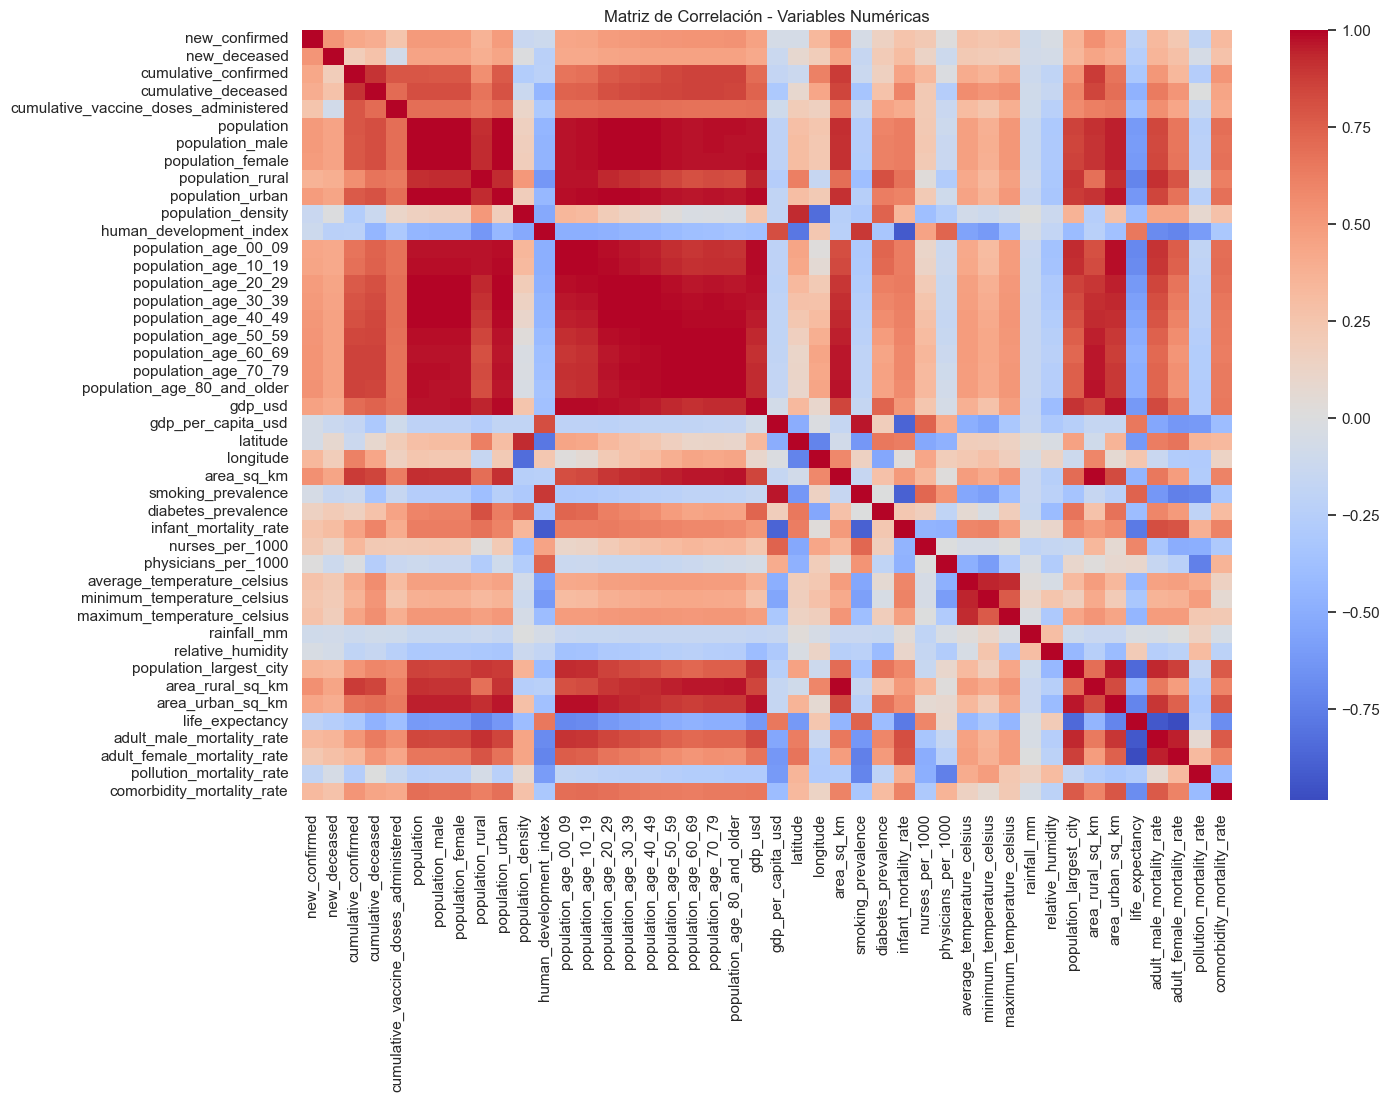

In [95]:
matriz_correlacion = datos_paises_interes.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacion, cmap='coolwarm')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

- Fuertes correlaciones positivas (cercanas a 1) entre variables acumulativas como cumulative_confirmed,
cumulative_deceased, y cumulative_vaccine_doses_administered. Esto es esperado, ya que todas crecen con el tiempo.
- Correlaciones positivas notables entre new_confirmed y new_deceased (casos nuevos y muertes nuevas),
lo que es lógico en la progresión de la enfermedad.
- Interesantes correlaciones con variables demográficas y de salud. Por ejemplo, population (población)
muestra fuertes correlaciones positivas con la mayoría de las métricas de COVID-19,
indicando que países más poblados tienen más casos, muertes y dosis administradas.
- Las correlaciones entre variables ambientales (temperatura, lluvia, humedad) y las métricas de COVID-19
parecen ser generalmente débiles, sugiriendo que estos factores por sí solos no explican la propagación del virus.


### Se seleccionan las correlaciones mayores a 0.5

In [ ]:
correlacion_filtrada = matriz_correlacion.copy()
correlacion_filtrada[abs(correlacion_filtrada) < 0.5] = np.nan 

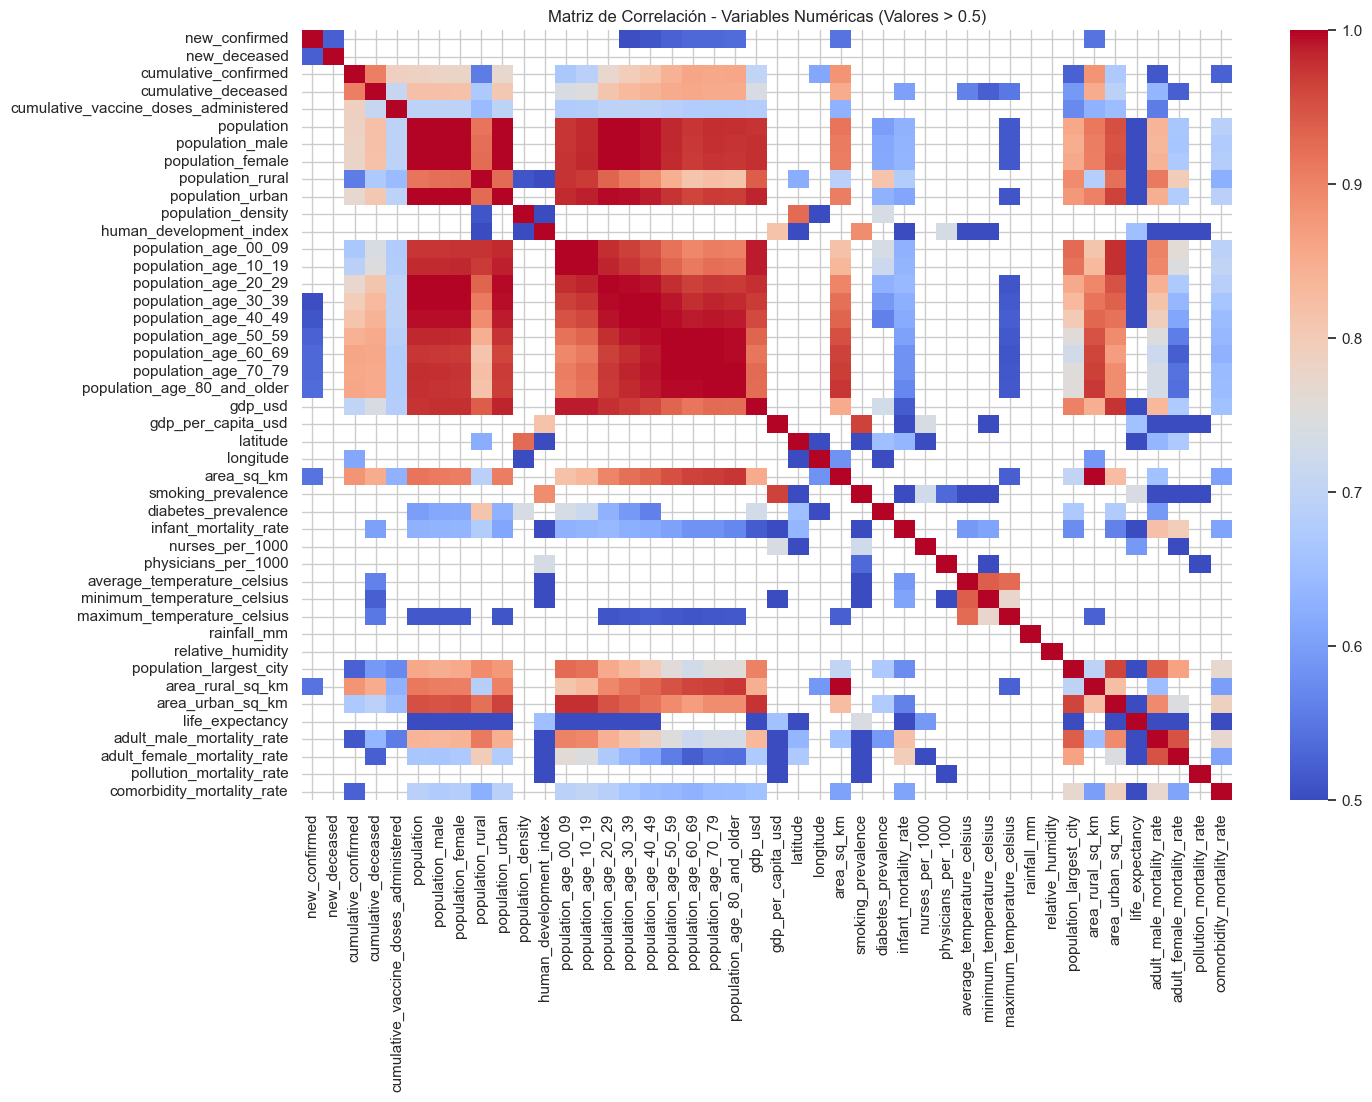

In [97]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlacion_filtrada, cmap='coolwarm', vmin=0.5, vmax=1)
plt.title('Matriz de Correlación - Variables Numéricas (Valores > 0.5)')
plt.show()

### Se crean Histogramas para la distribución de las variables clave 'new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered'

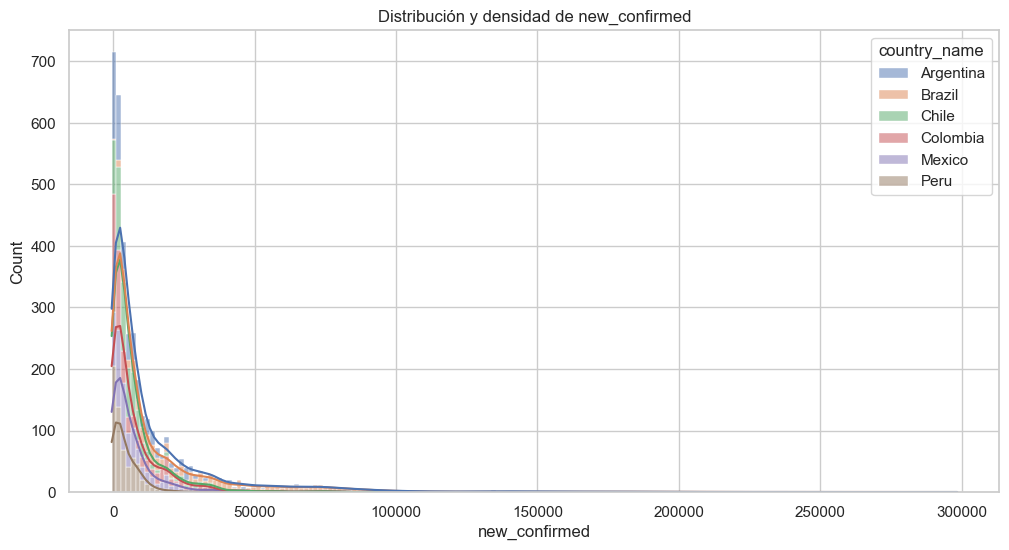

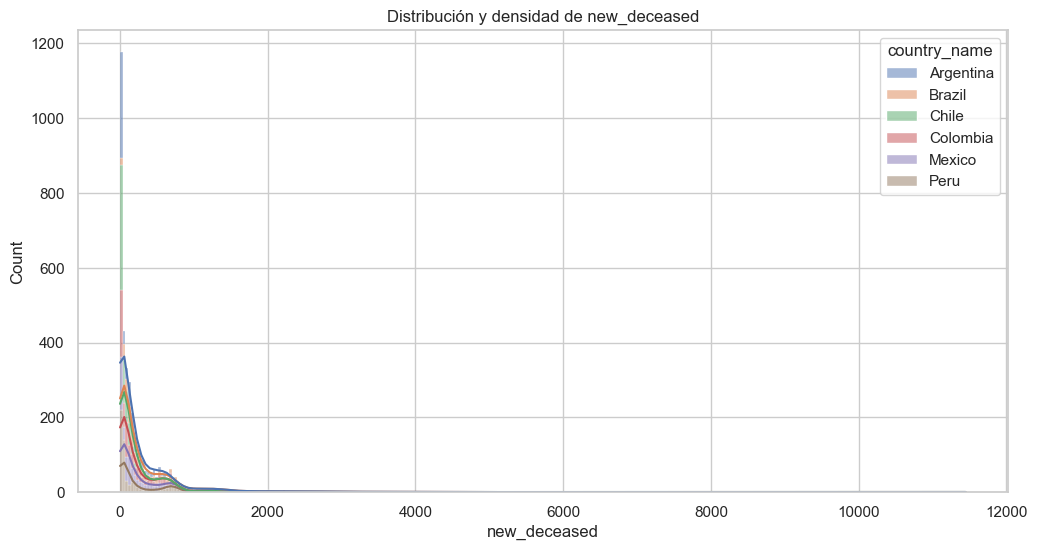

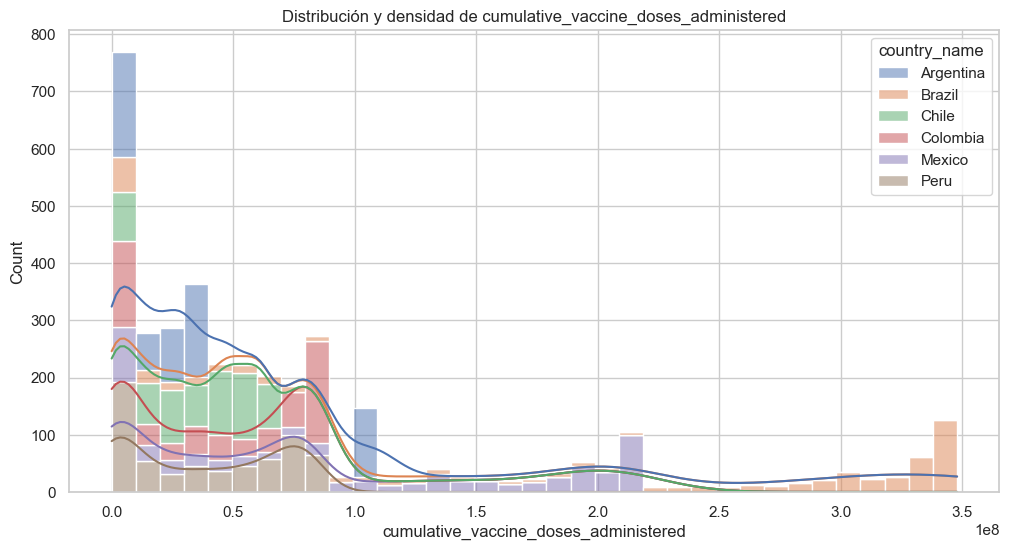

In [82]:
variables = ['new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered']

for variable in variables:
    plt.figure(figsize=(12,6))
    sns.histplot(data=datos_paises_interes, x=variable, hue='country_name', kde=True, multiple="stack")
    plt.title(f'Distribución y densidad de {variable}')
    plt.xlabel(variable)
    plt.show()

### Se crean diagramas de barras que comparan las varibles númericas entre los diferentes países

In [109]:
variables_numericas = datos_paises_interes.select_dtypes(include=[np.number]).columns.tolist()

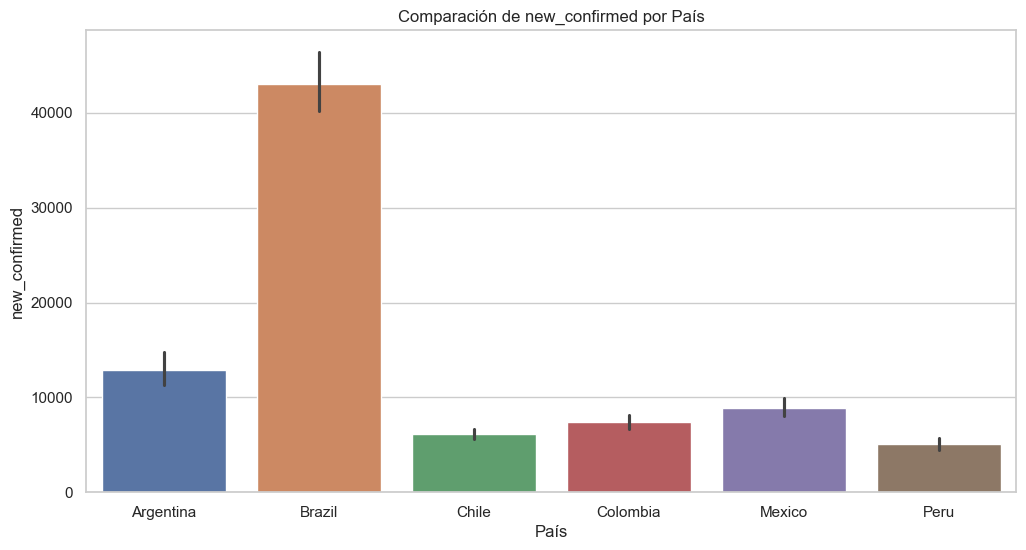

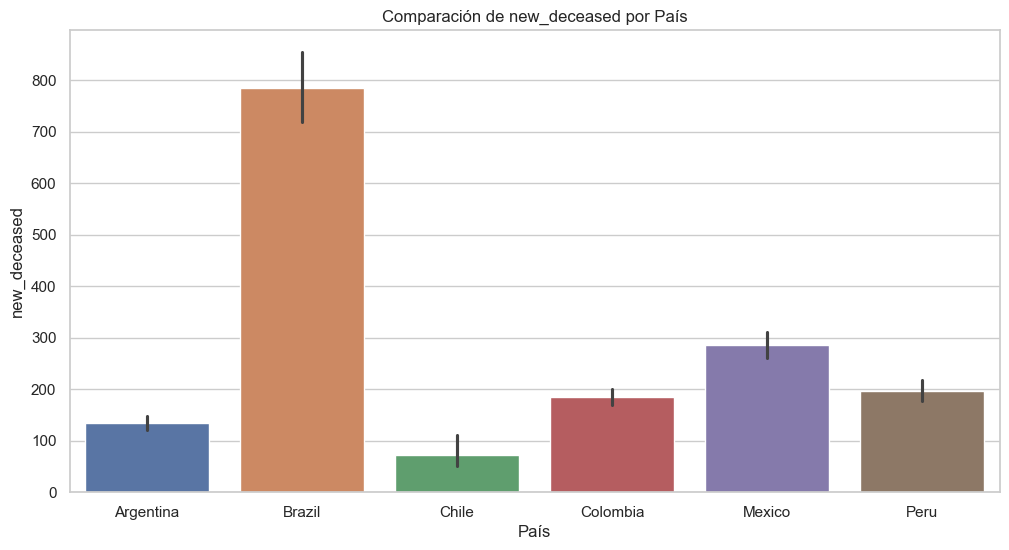

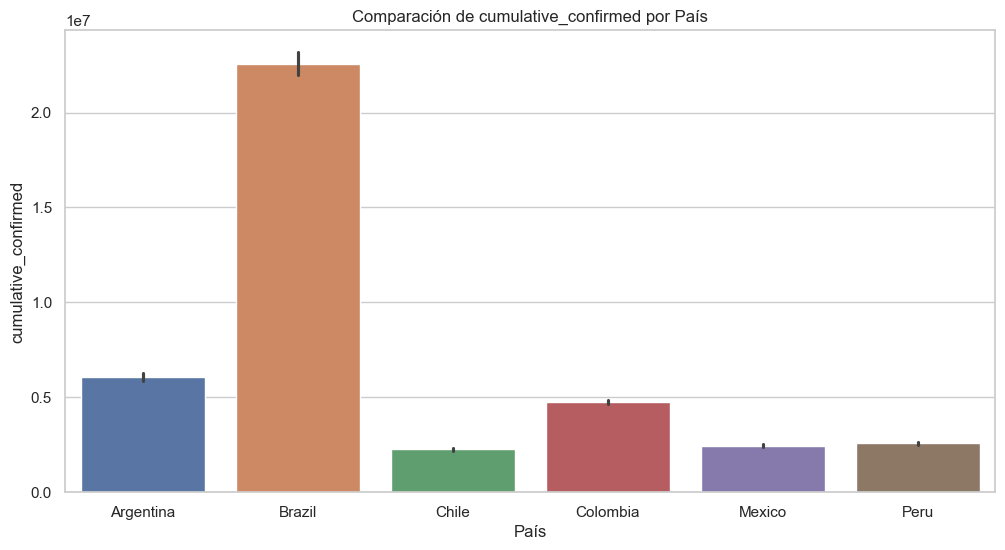

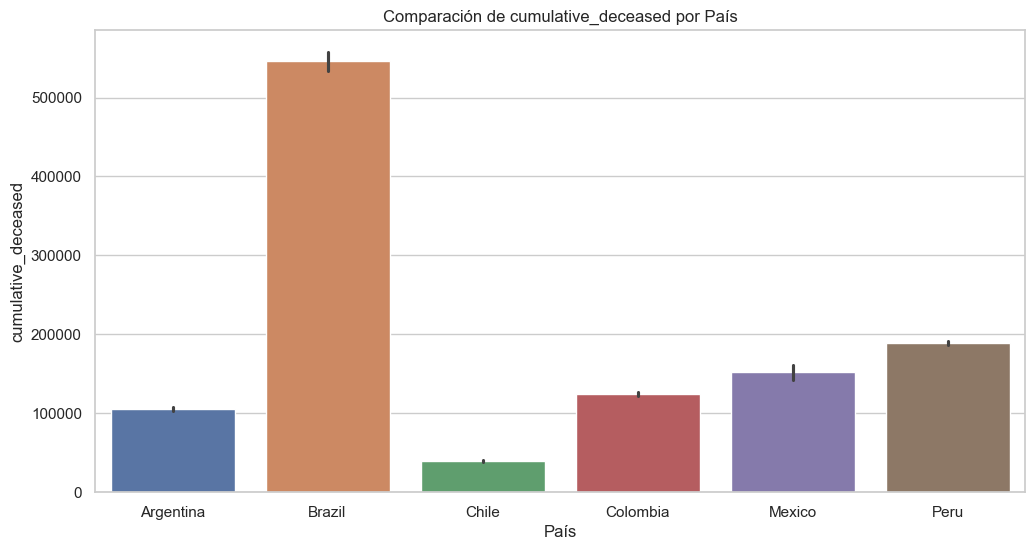

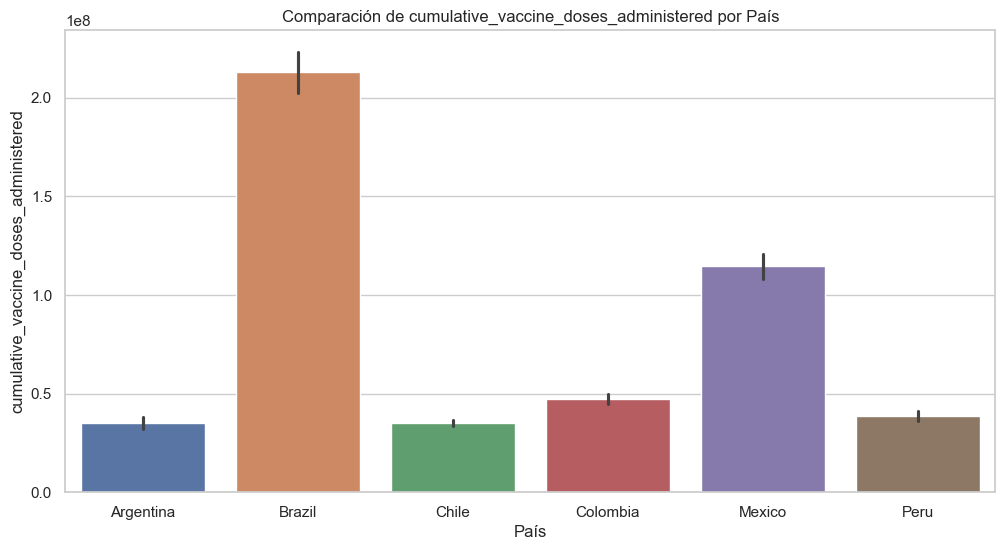

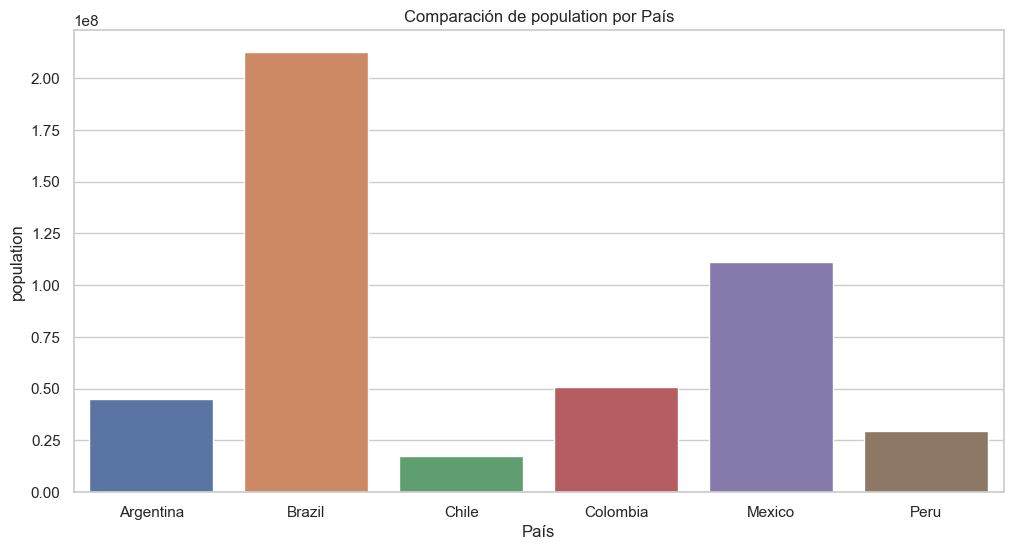

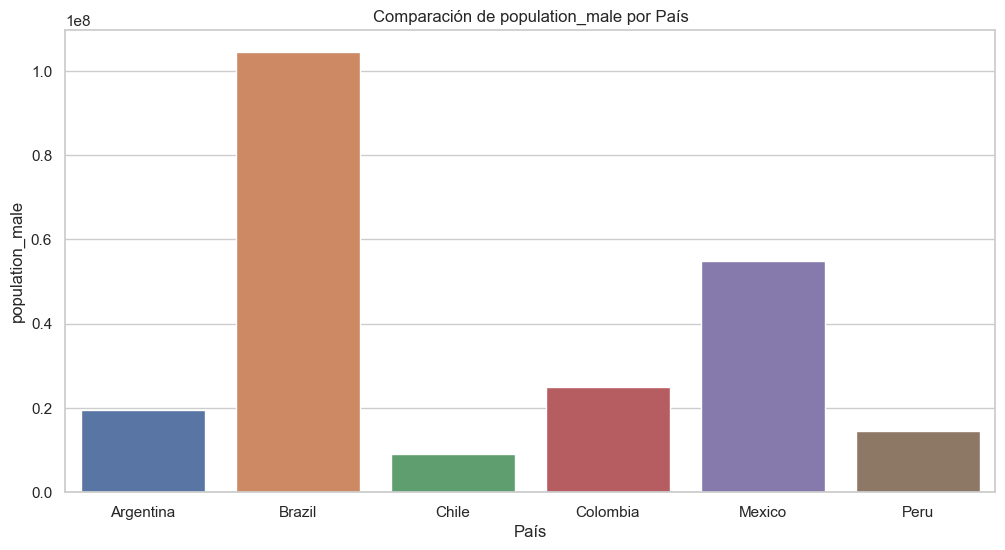

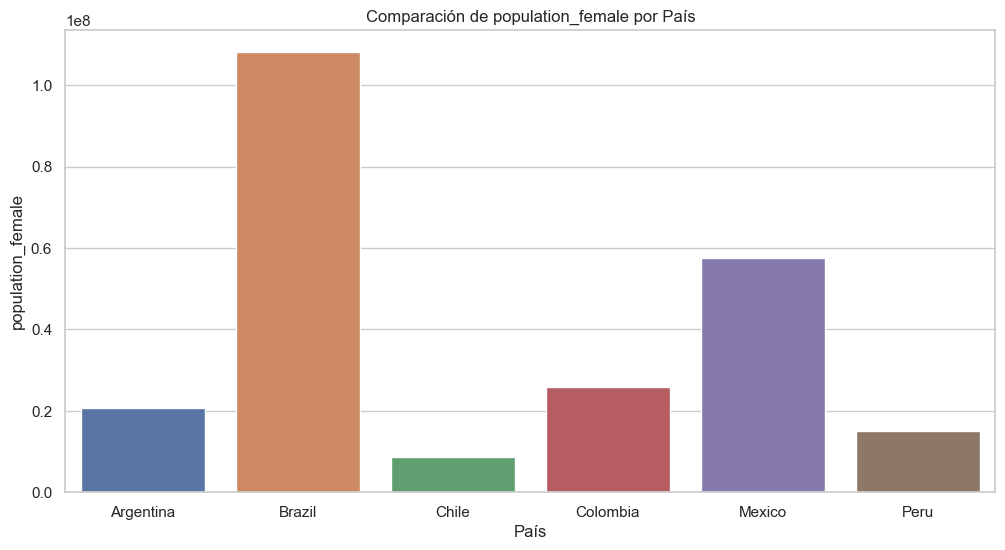

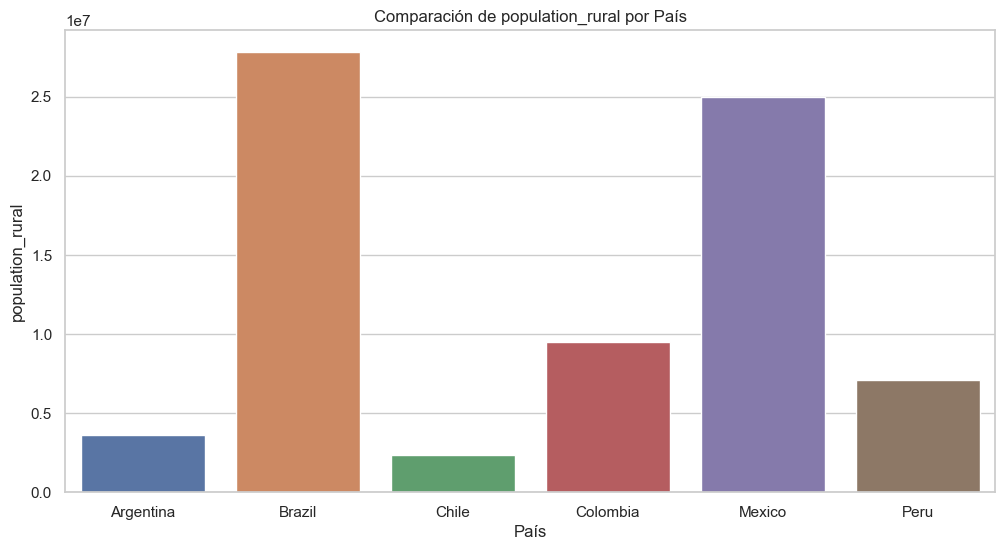

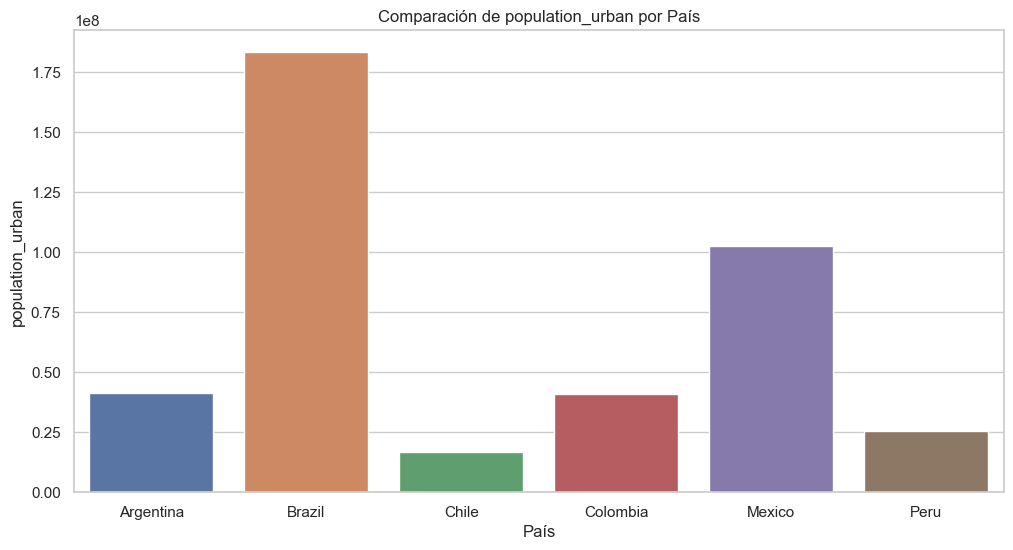

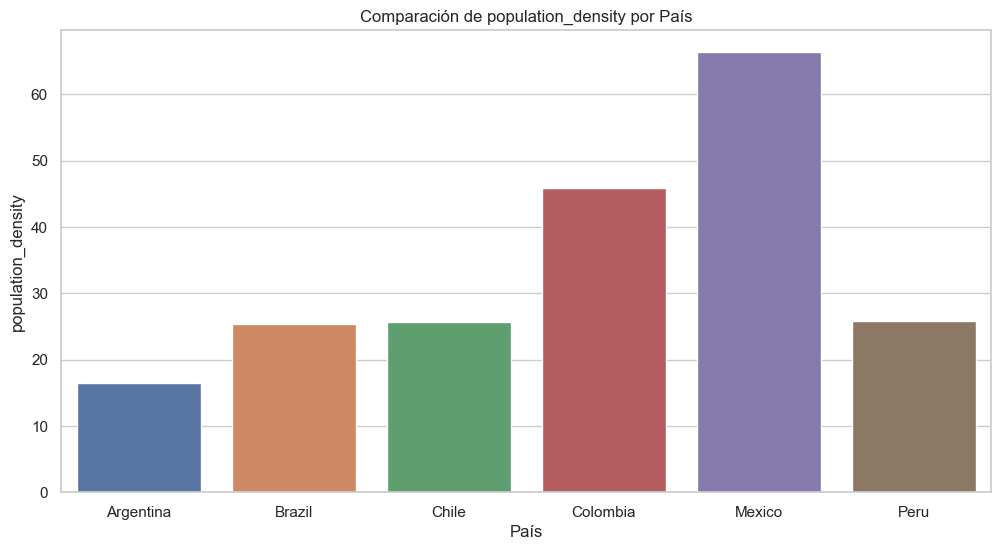

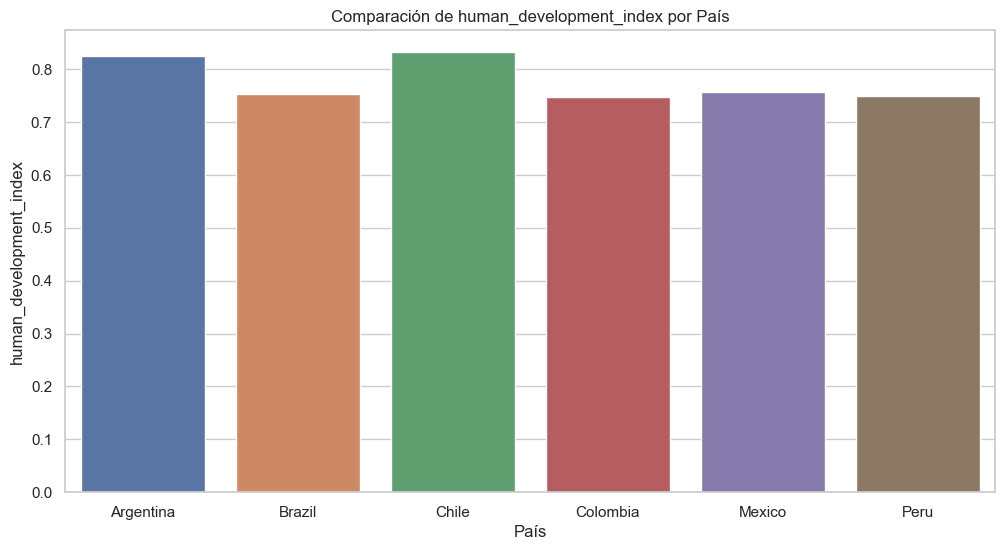

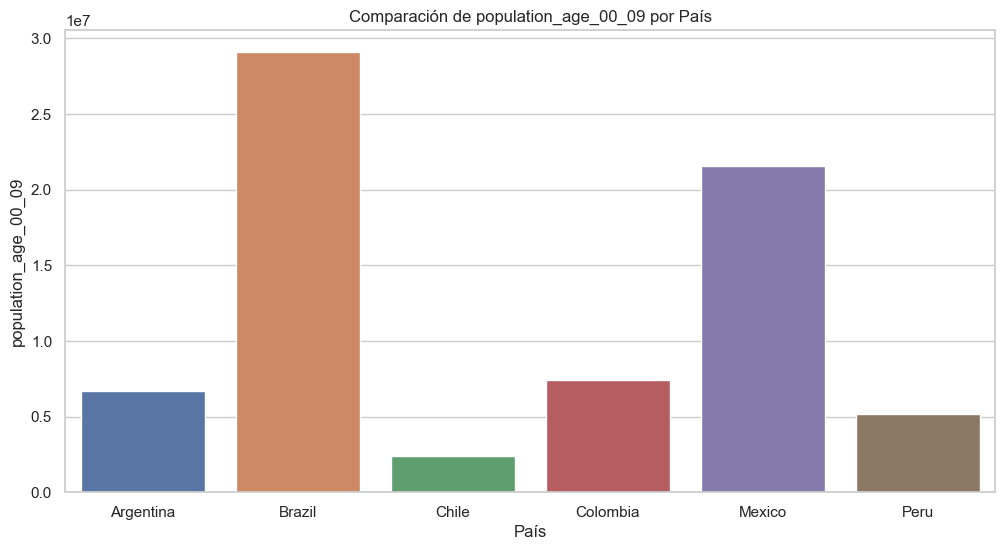

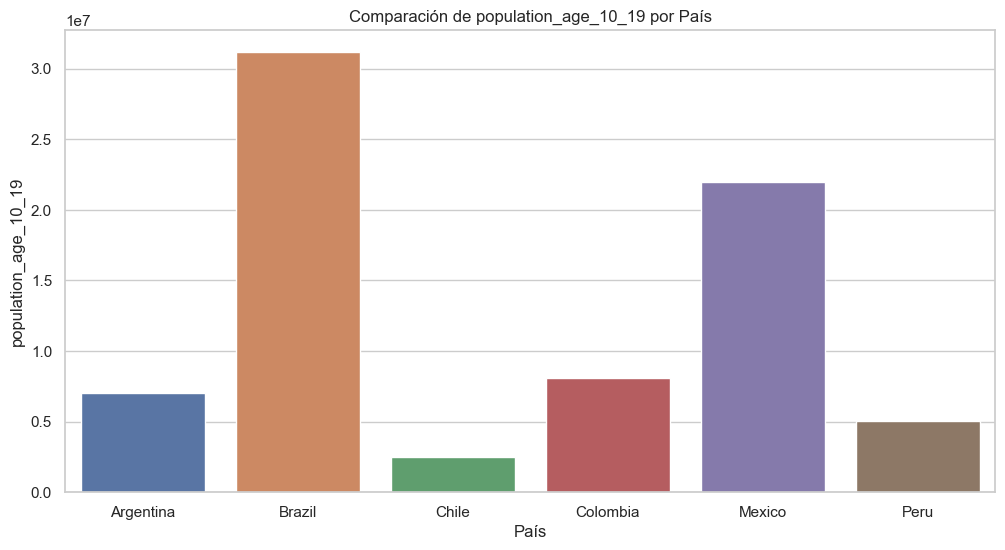

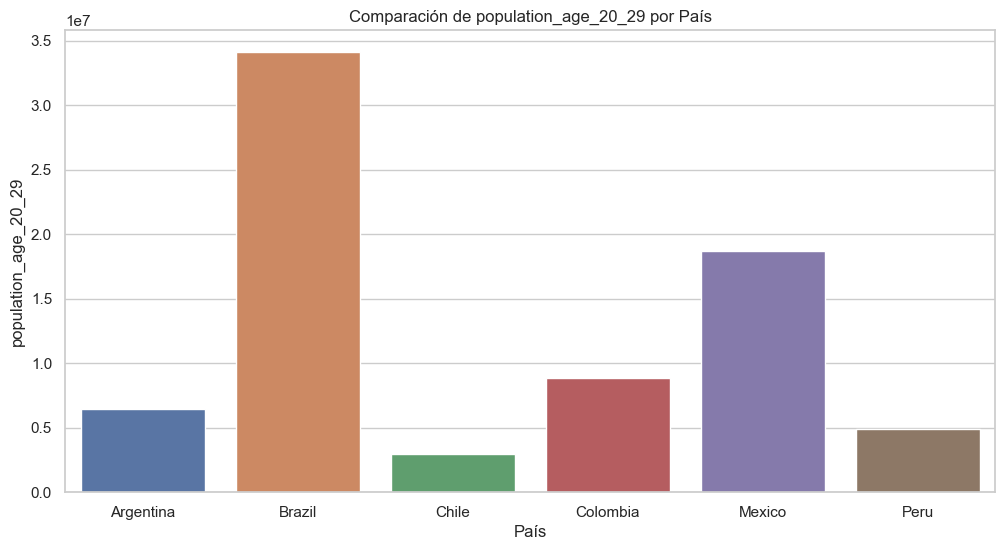

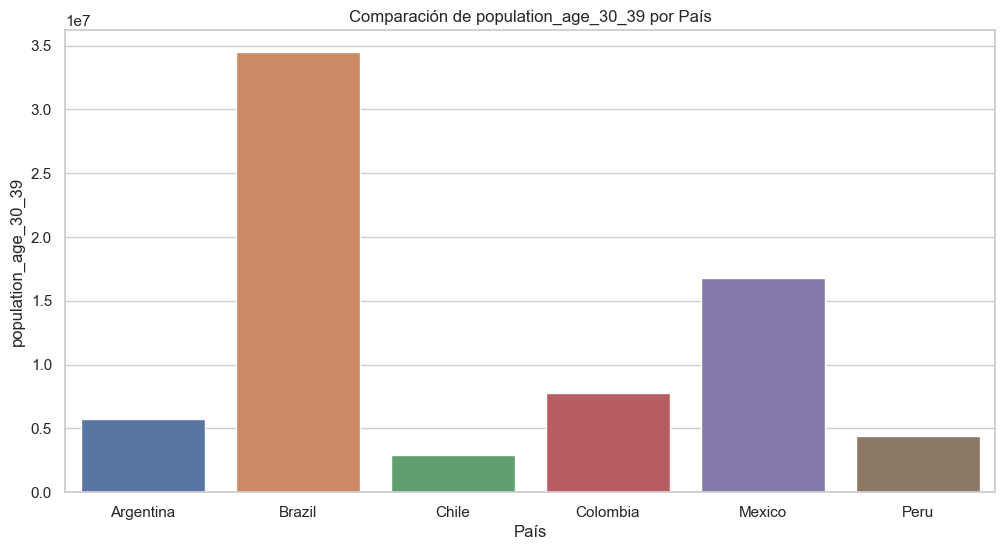

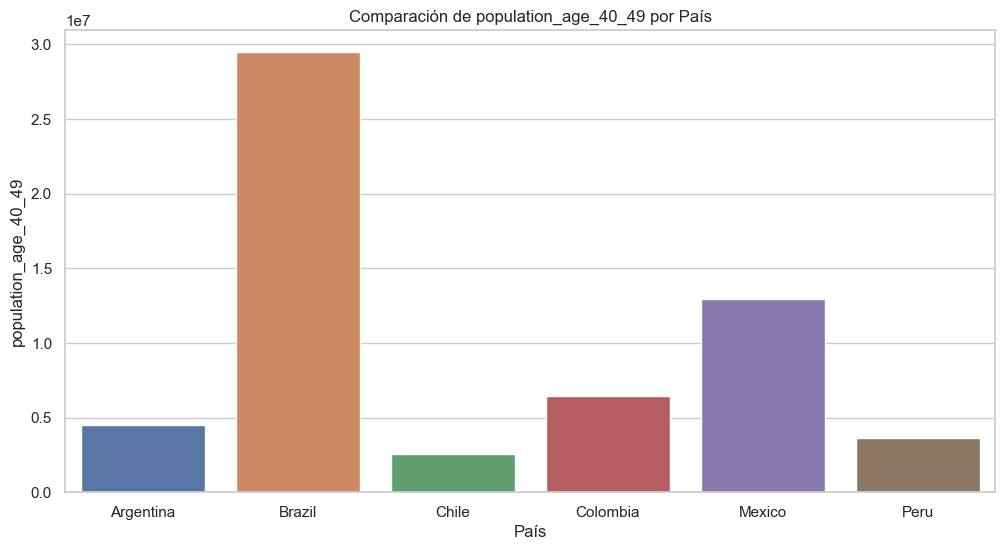

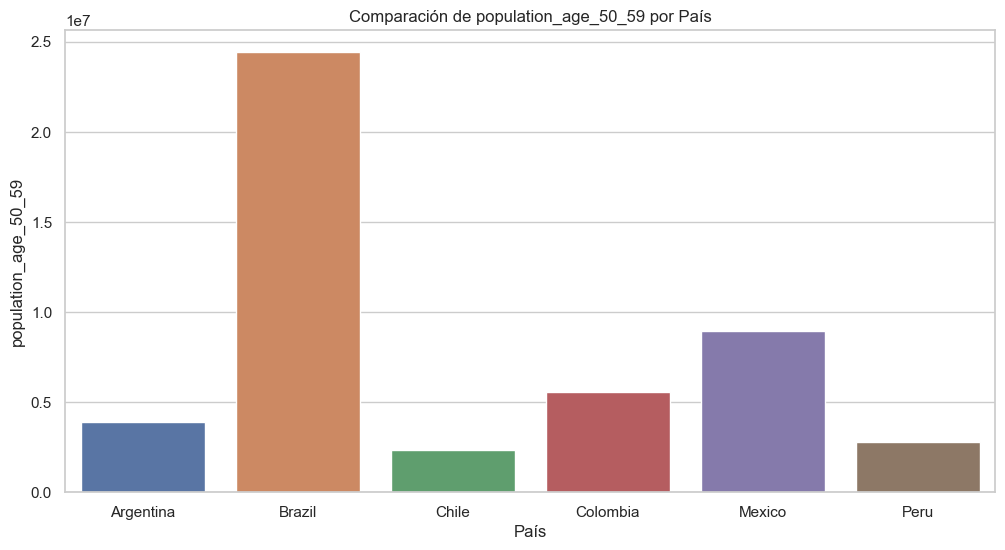

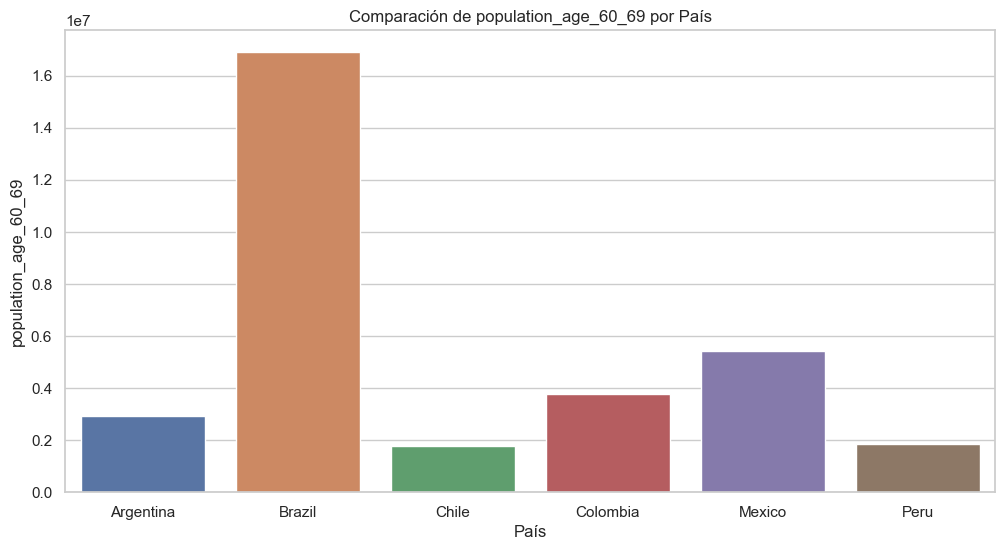

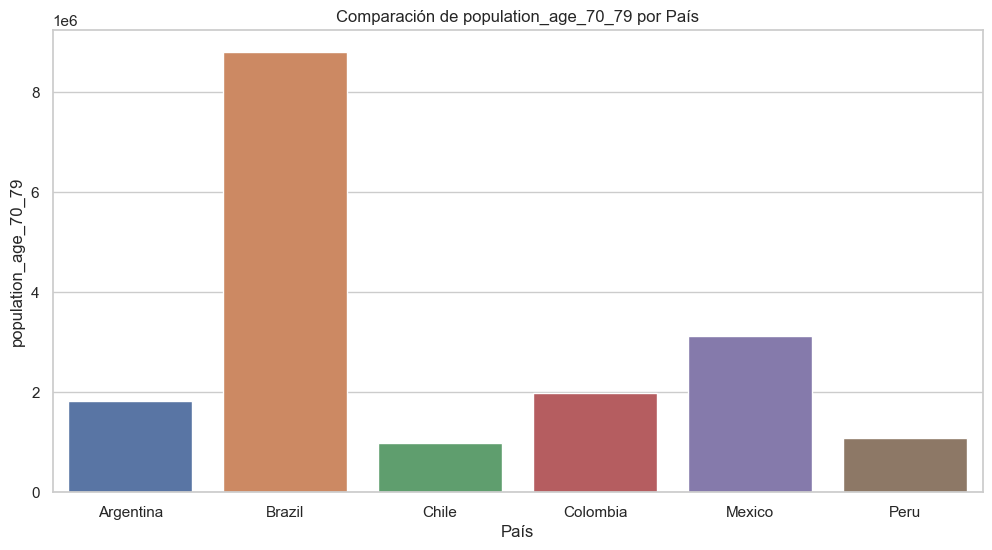

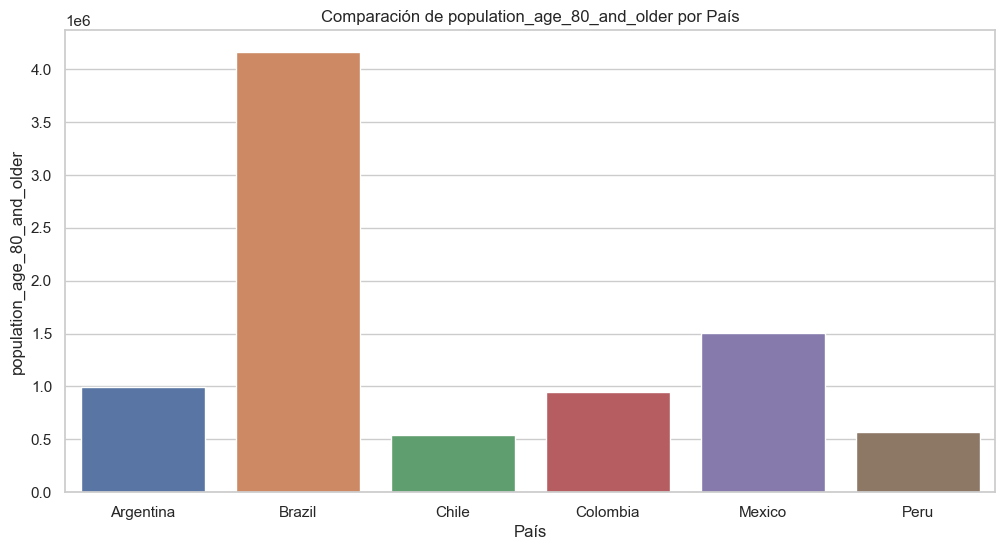

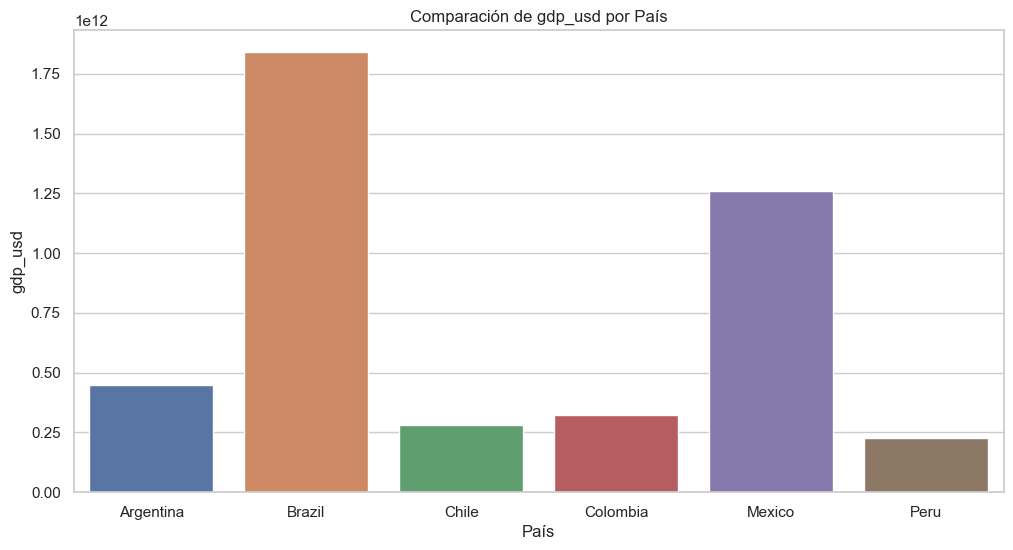

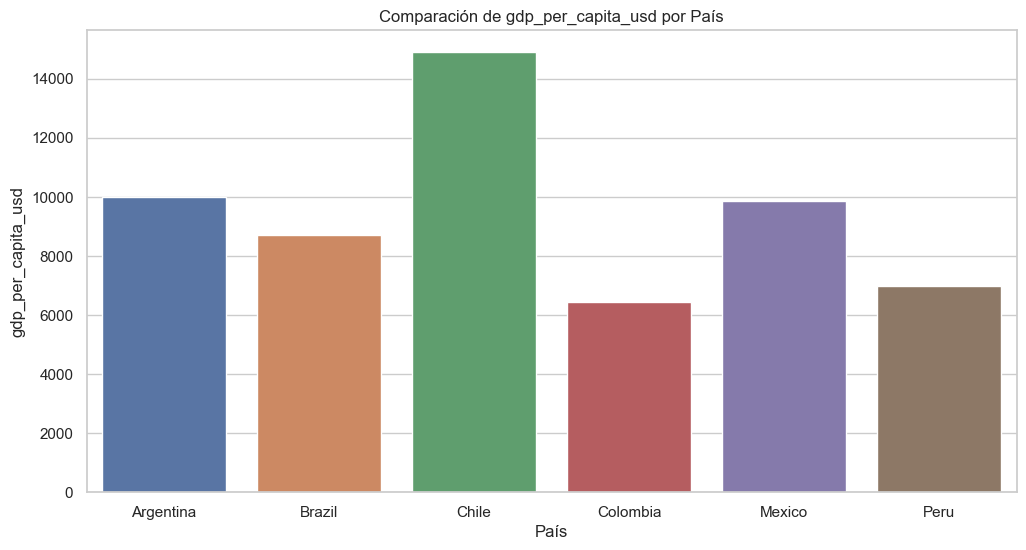

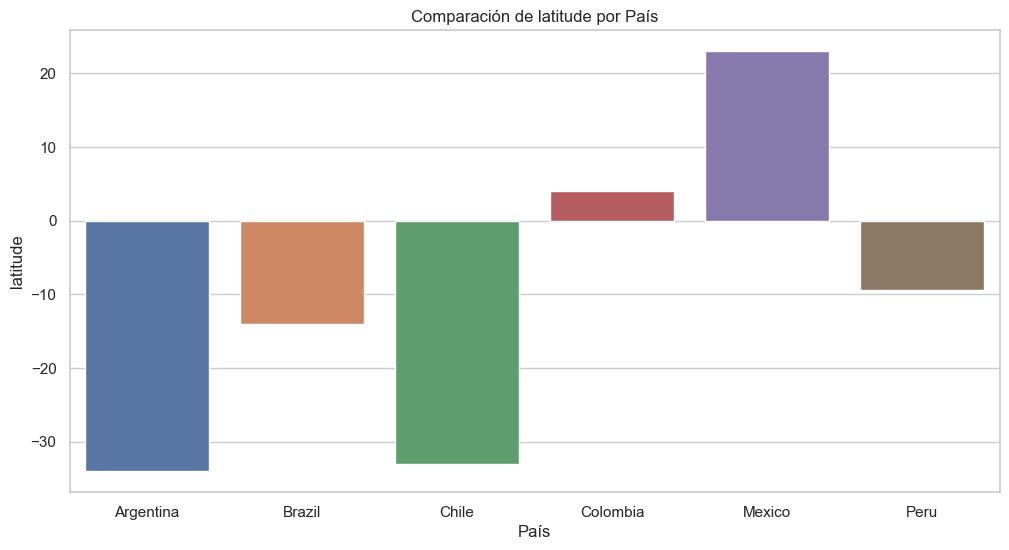

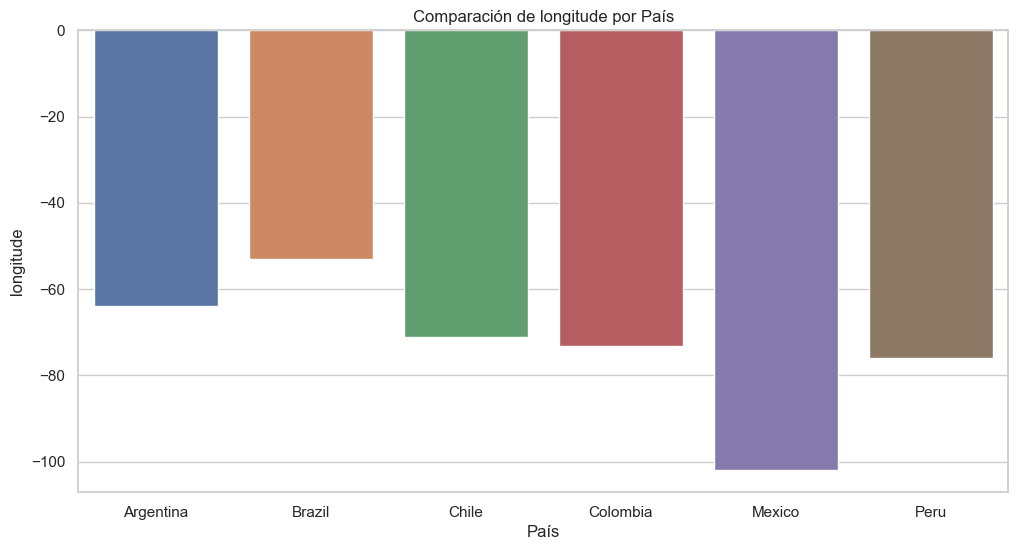

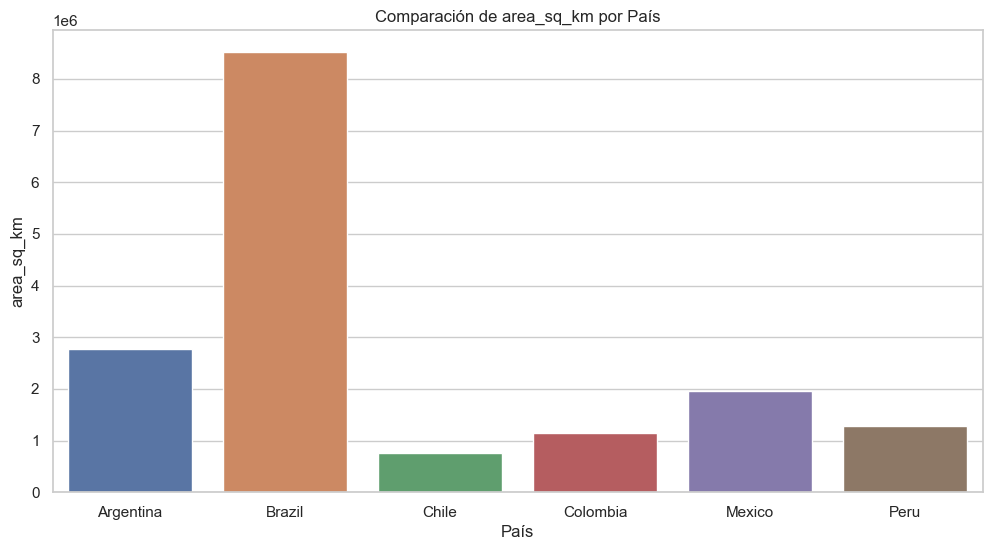

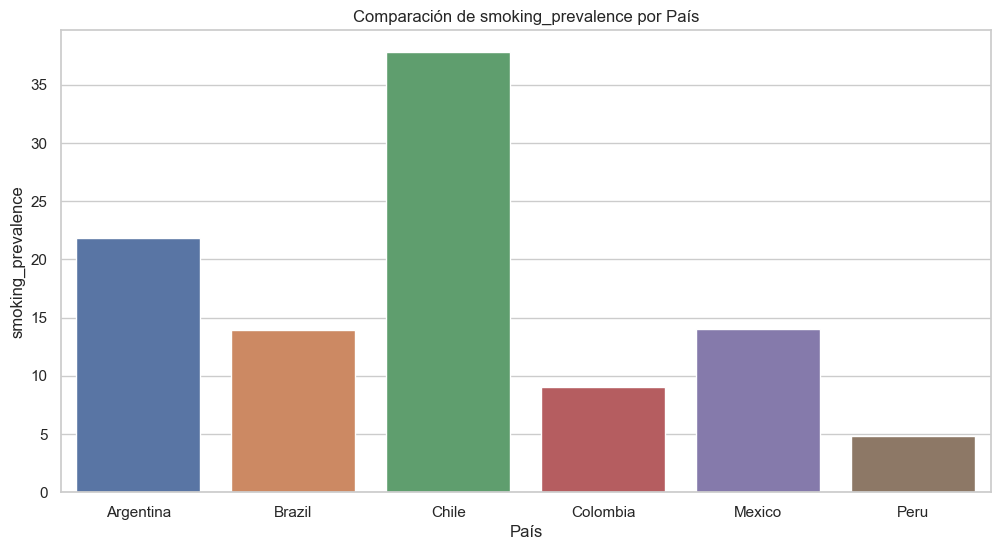

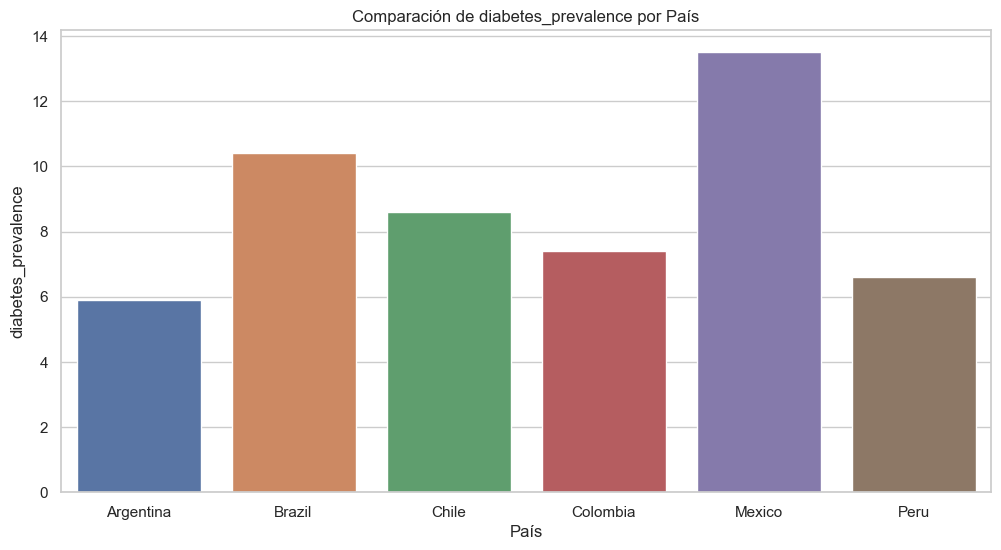

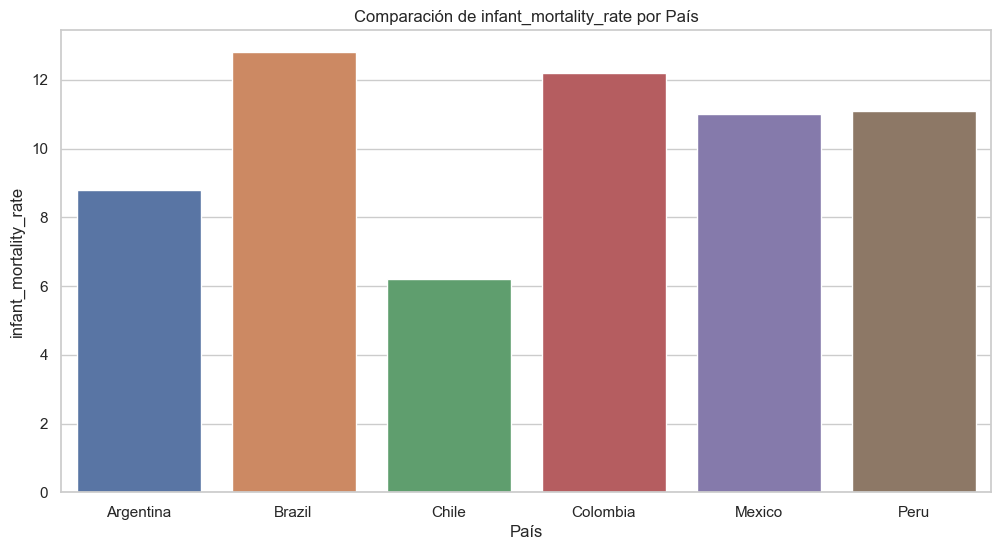

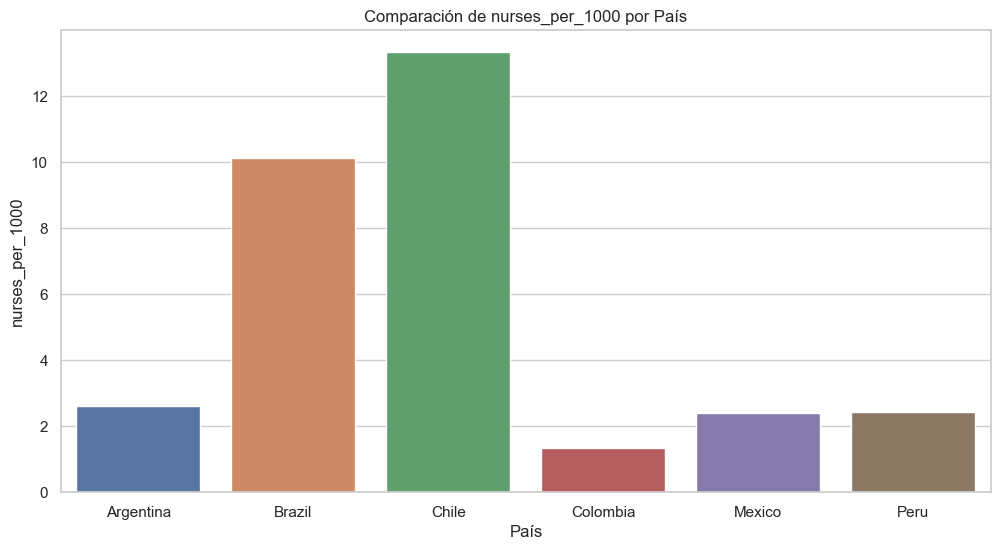

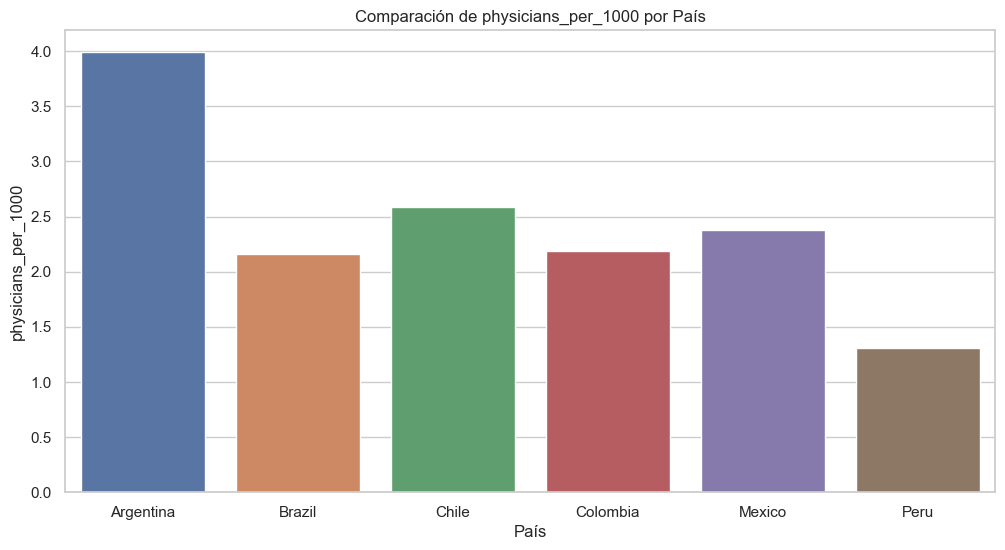

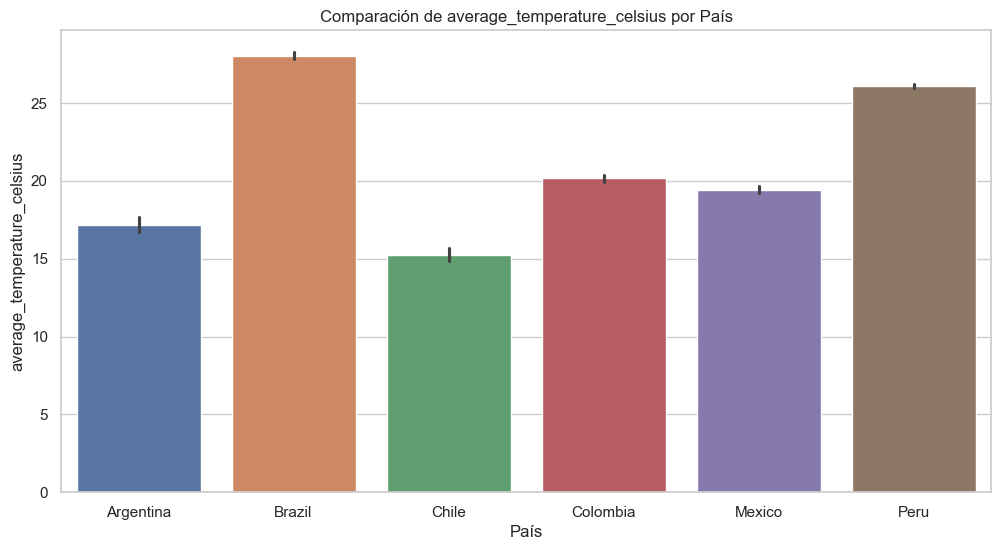

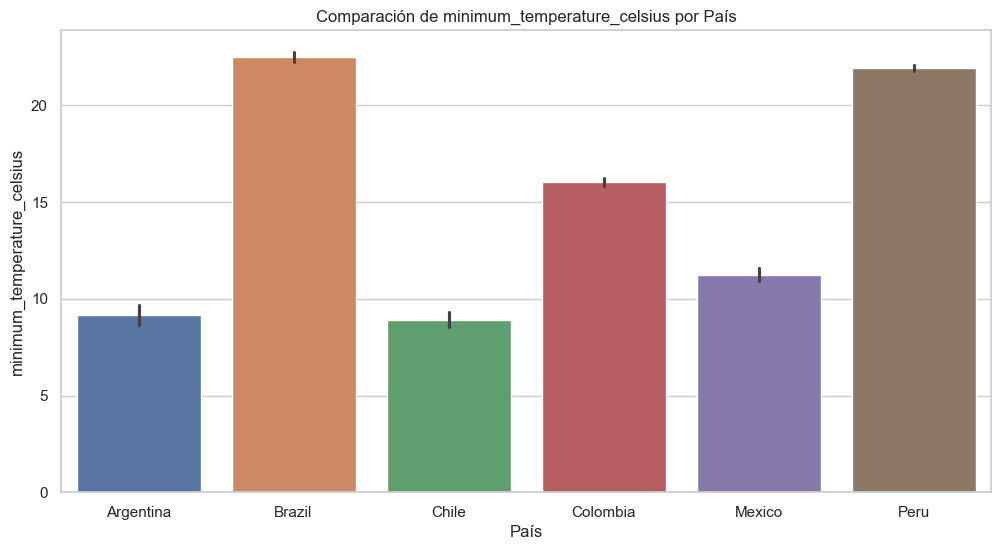

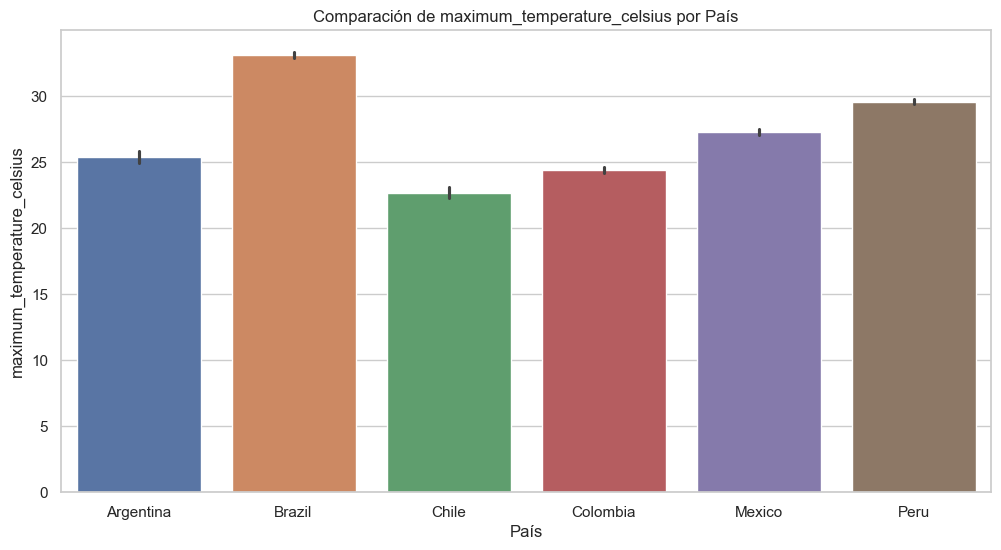

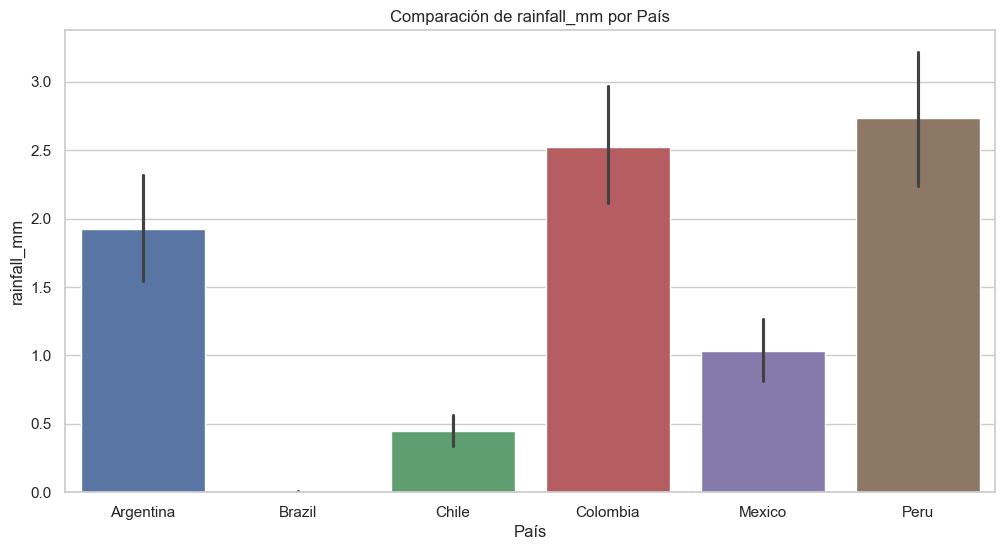

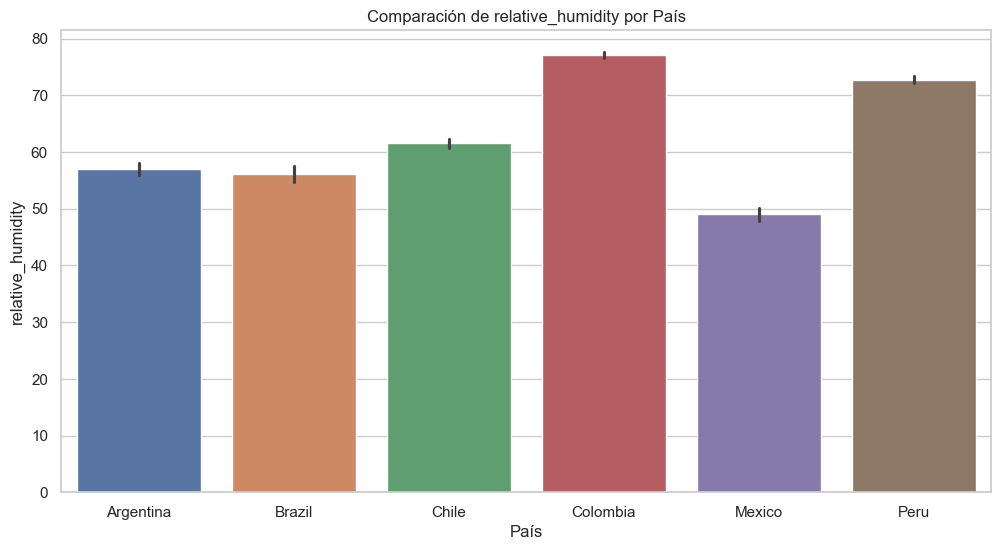

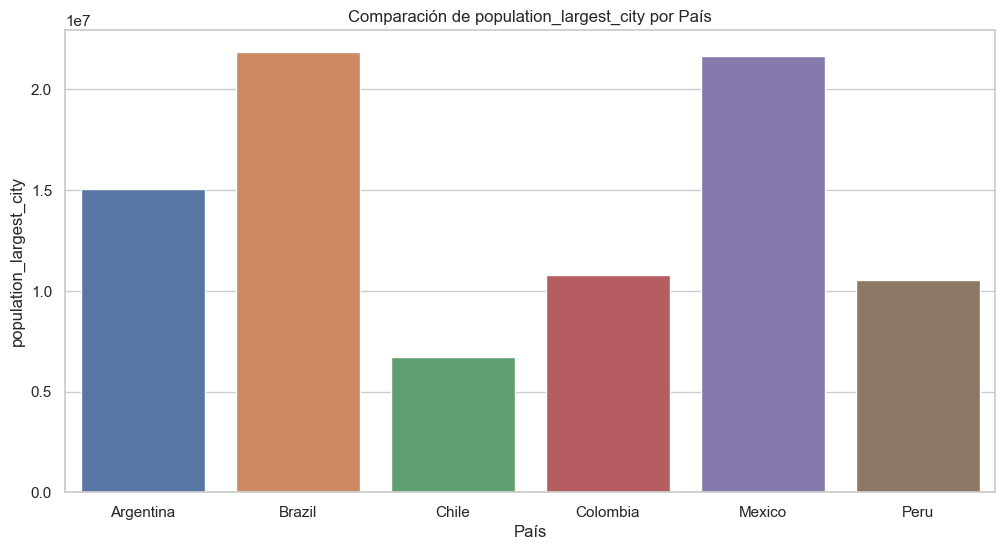

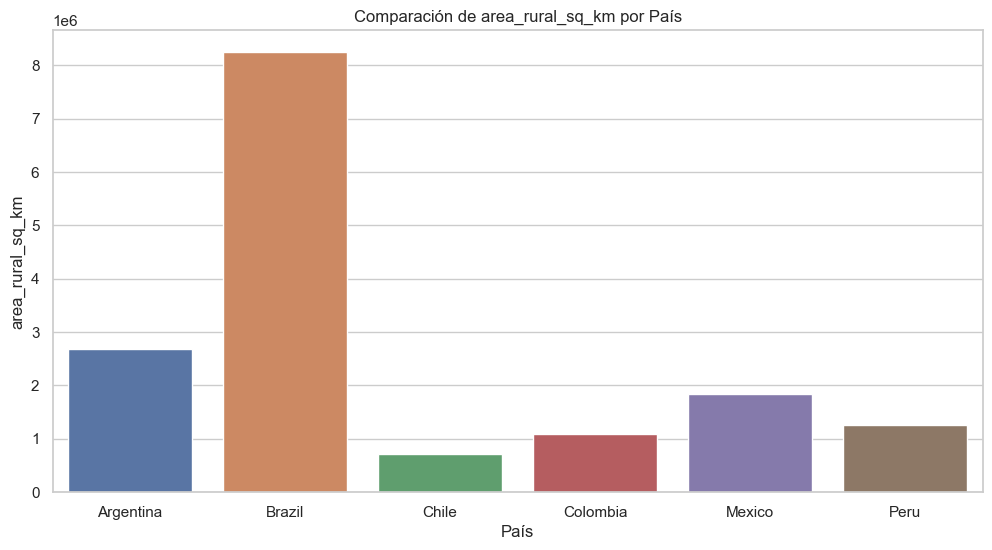

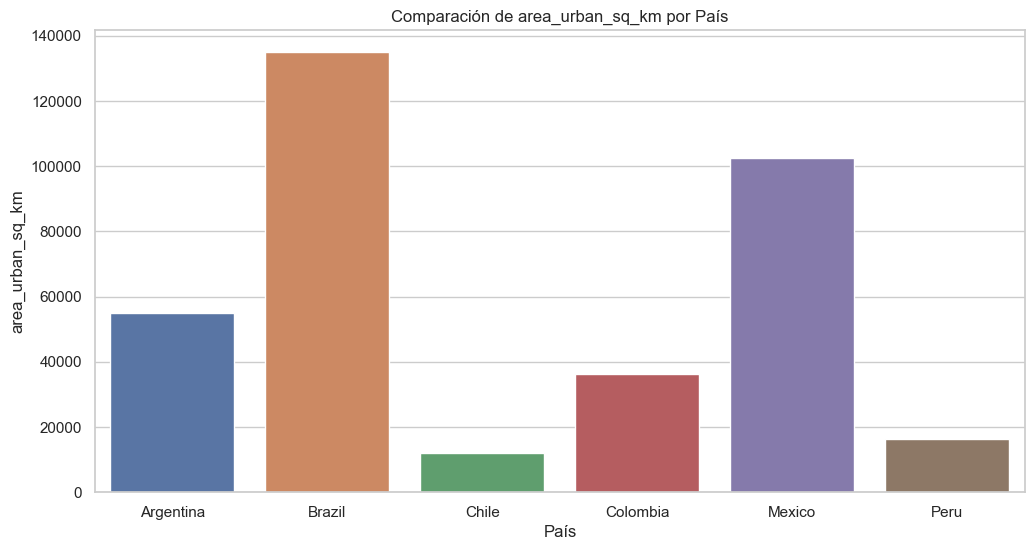

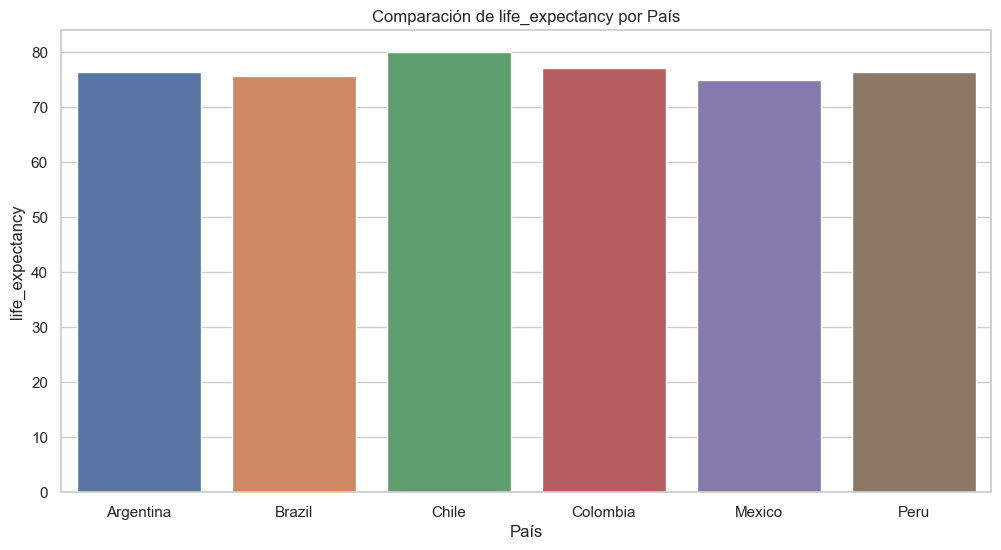

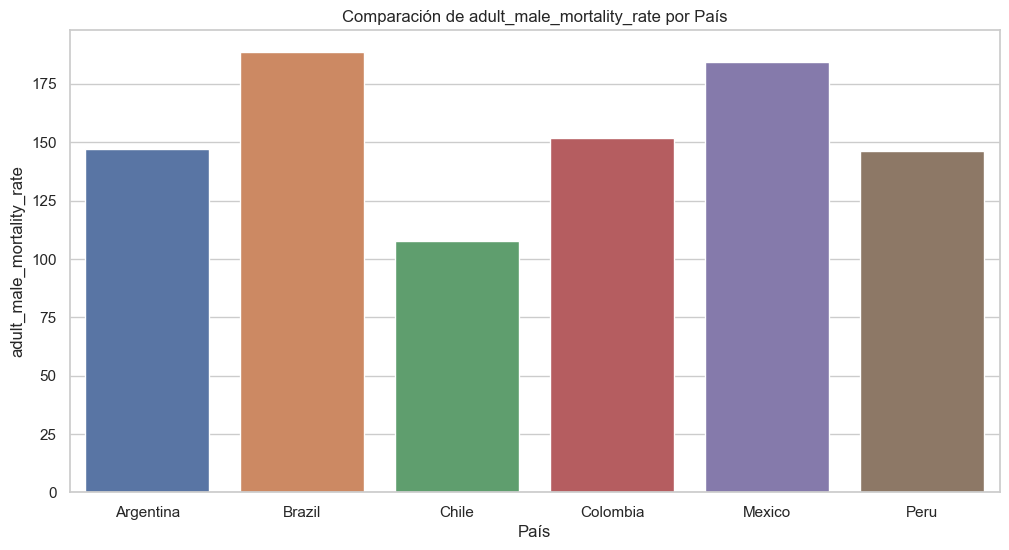

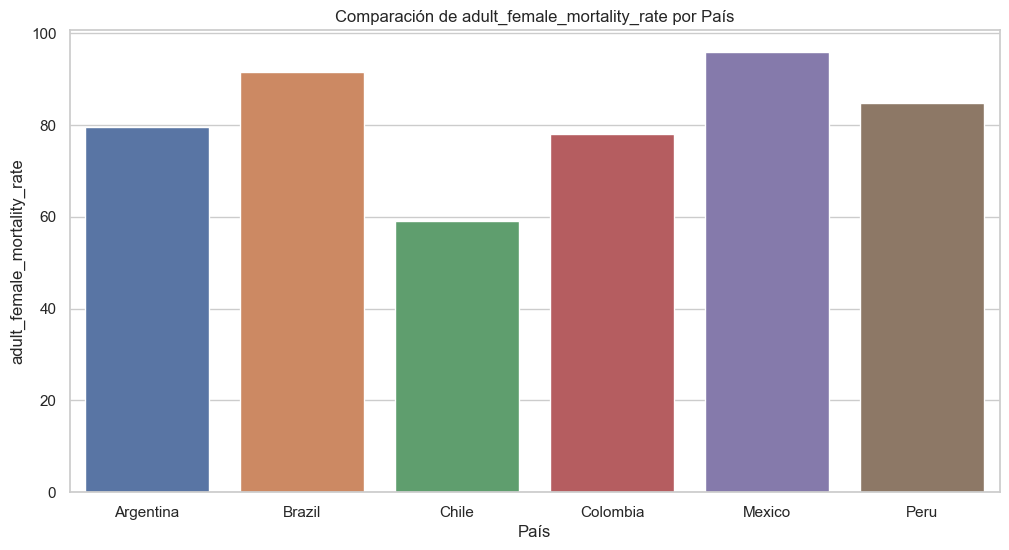

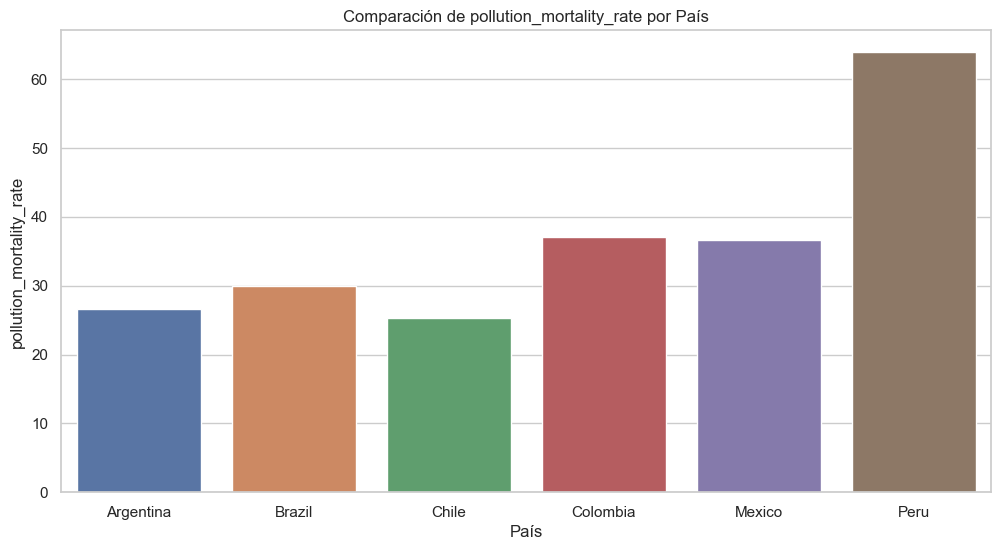

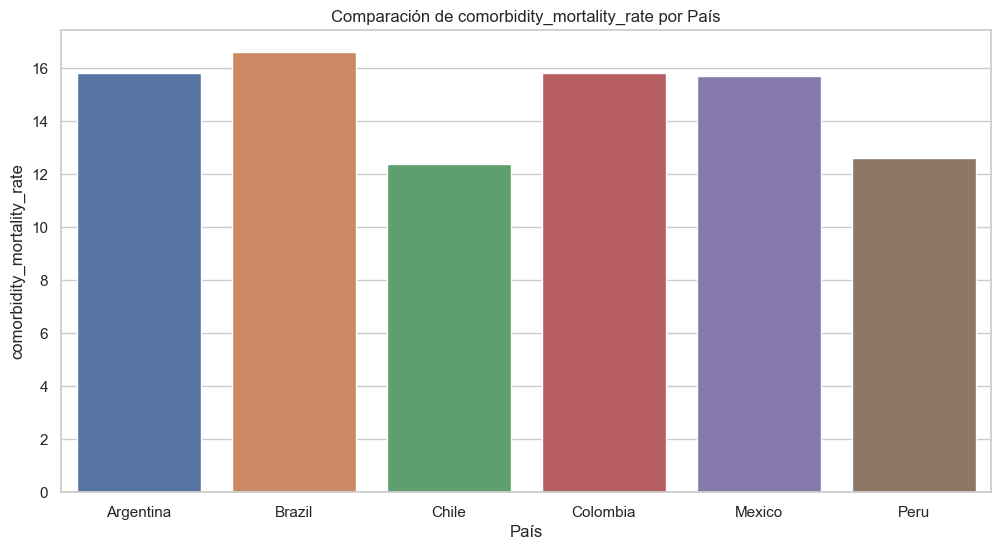

In [112]:
for variable in variables_numericas:
    plt.figure(figsize=(12, 6))
    sns.barplot(data= datos_paises_interes, x='country_name', y=variable, hue='country_name')
    plt.title(f'Comparación de {variable} por País')
    plt.xlabel('País')
    plt.ylabel(variable)
    plt.show()

- Brasil y México consistentemente muestran un promedio de new_confirmed y new_deceased
 mucho más alto que los otros países, lo cual es de esperar dado su tamaño poblacional.
- Argentina, Colombia, Perú y Chile presentan promedios más bajos, pero aún significativos.

Estos gráficos sirven para una comparación rápida de la magnitud de la pandemia
entre los países de interés.

### Temperatura media vs Casos

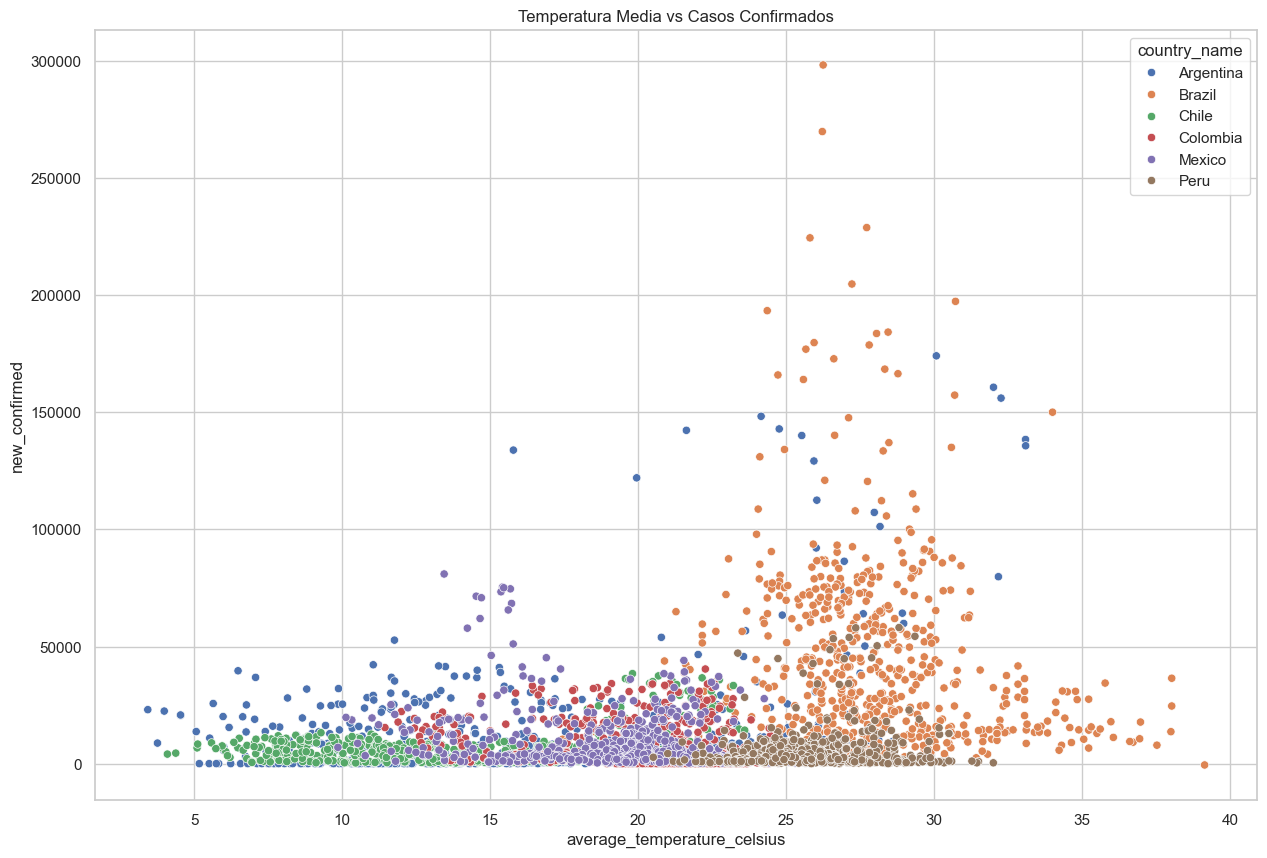

In [99]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=datos_paises_interes, x='average_temperature_celsius', y='new_confirmed', hue='country_name')
plt.title('Temperatura Media vs Casos Confirmados')
plt.show() 

### Temp media vs Muertes

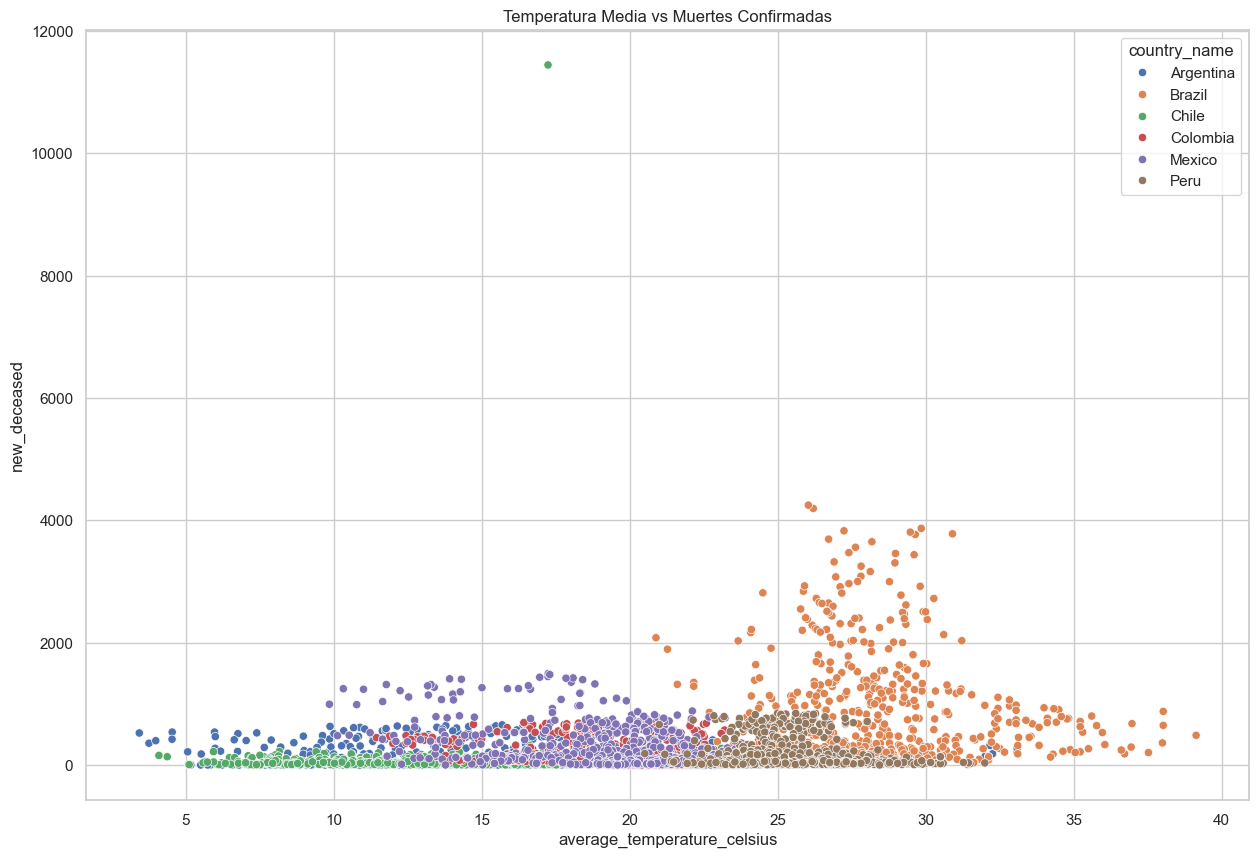

In [100]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=datos_paises_interes, x='average_temperature_celsius', y='new_deceased', hue='country_name')
plt.title('Temperatura Media vs Muertes Confirmadas')
plt.show()


- Los gráficos de dispersión no muestran una correlación lineal fuerte o un patrón claro
entre la temperatura media y el número de nuevos casos o muertes. Los puntos están bastante
dispersos en todo el rango de temperaturas.
- Los países se distribuyen en diferentes rangos de temperatura de acuerdo a su ubicación geográfica.
- Esto sugiere que, al menos en este dataset y para estos países, la temperatura por sí sola
no es un factor dominante o linealmente relacionado con la incidencia y mortalidad de COVID-19.
Otros factores epidemiológicos, sociales y de políticas de salud probablemente tienen un mayor peso.
Estos gráficos son importantes para descartar o confirmar hipótesis sobre factores ambientales.

### Se crea un diagrama de caja para ver la distribucón de la temperatura por país

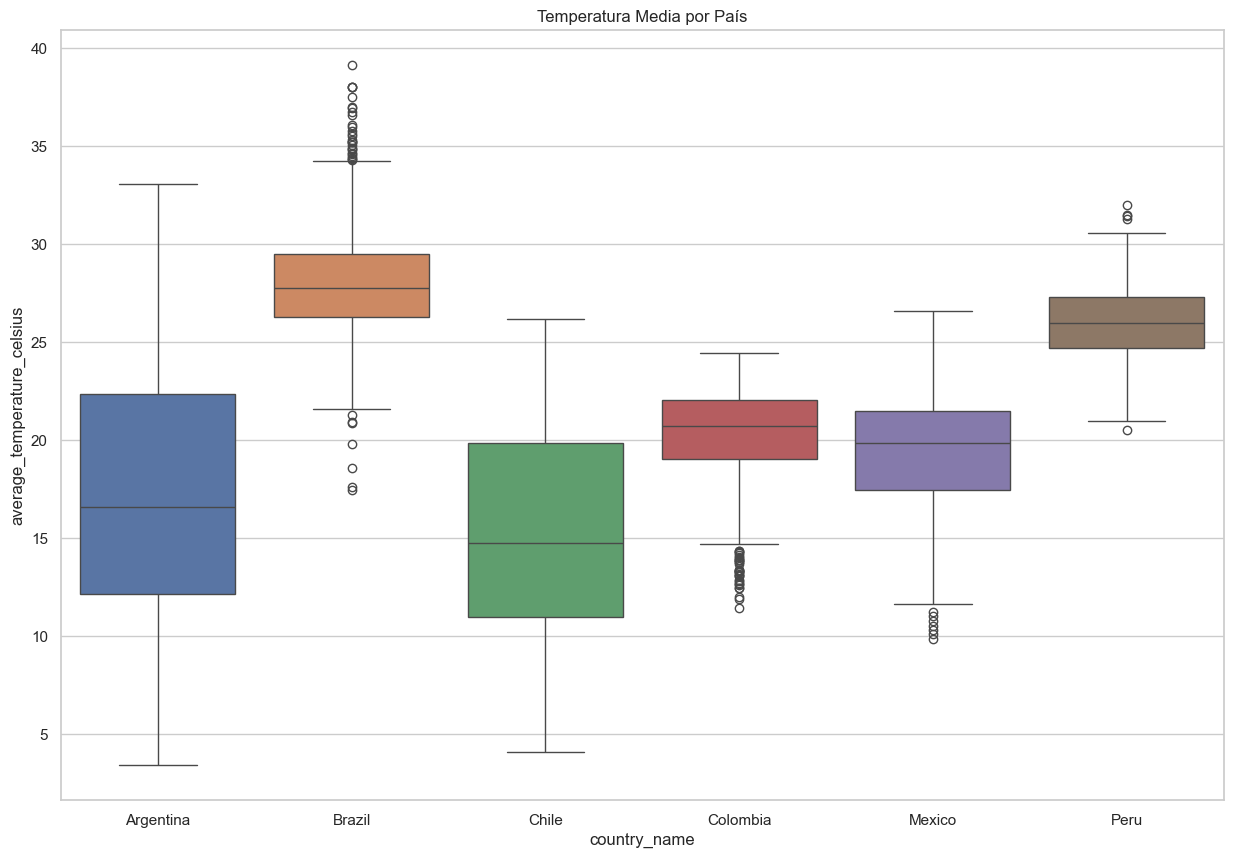

In [84]:

plt.figure(figsize=(15, 10))
sns.boxplot(data=datos_paises_interes, x='country_name', y='average_temperature_celsius', hue='country_name')
plt.title('Temperatura Media por País')
plt.show()

### Se crean diagramas de violin para ver la distribución de 'new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered' 

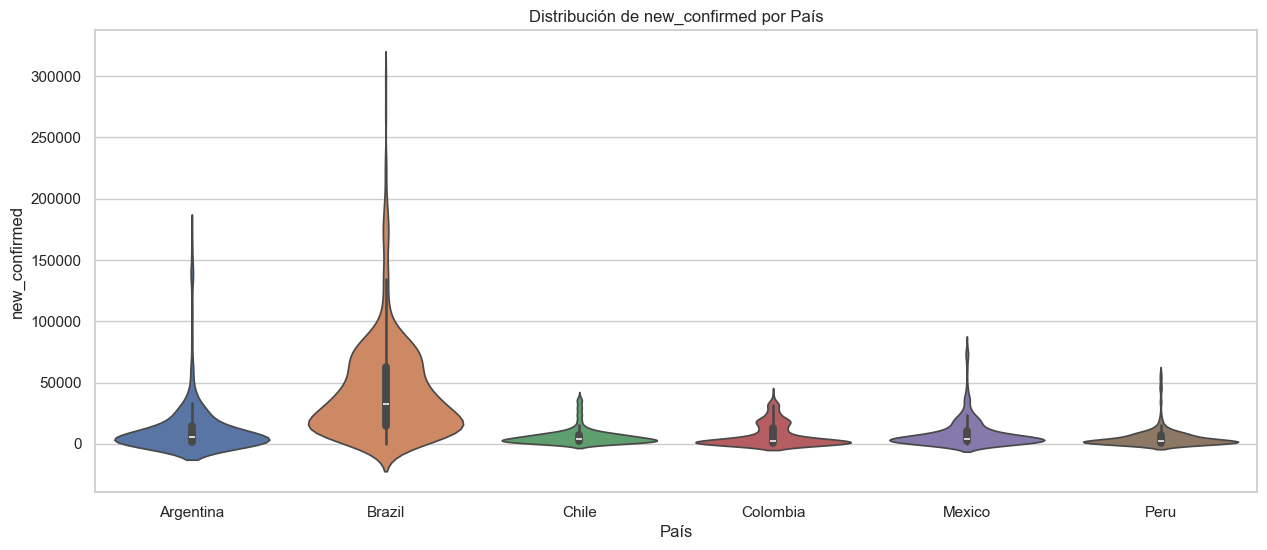

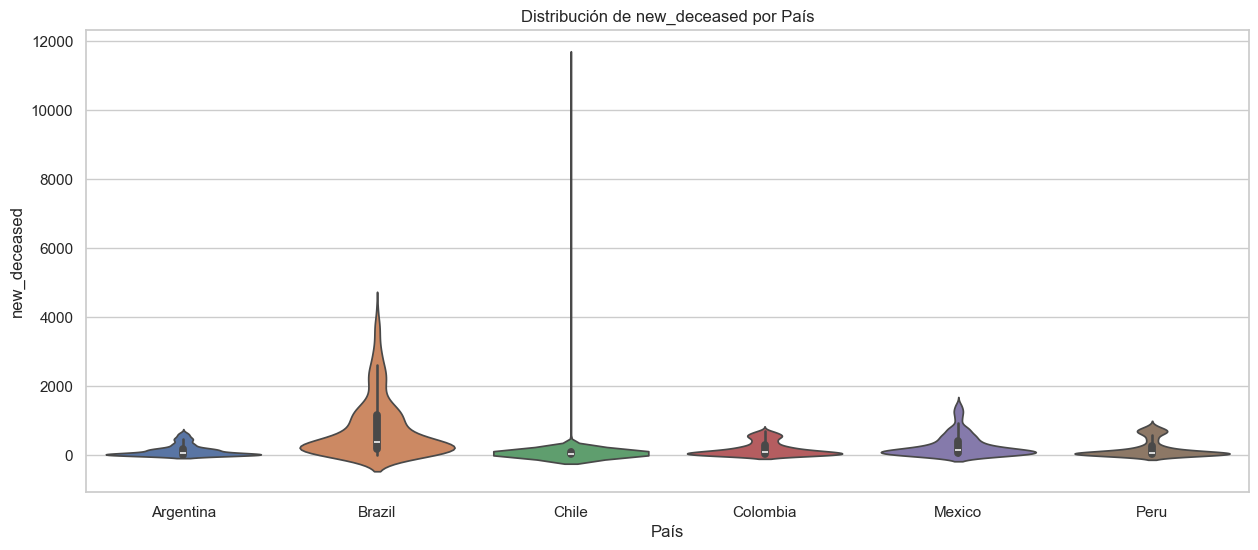

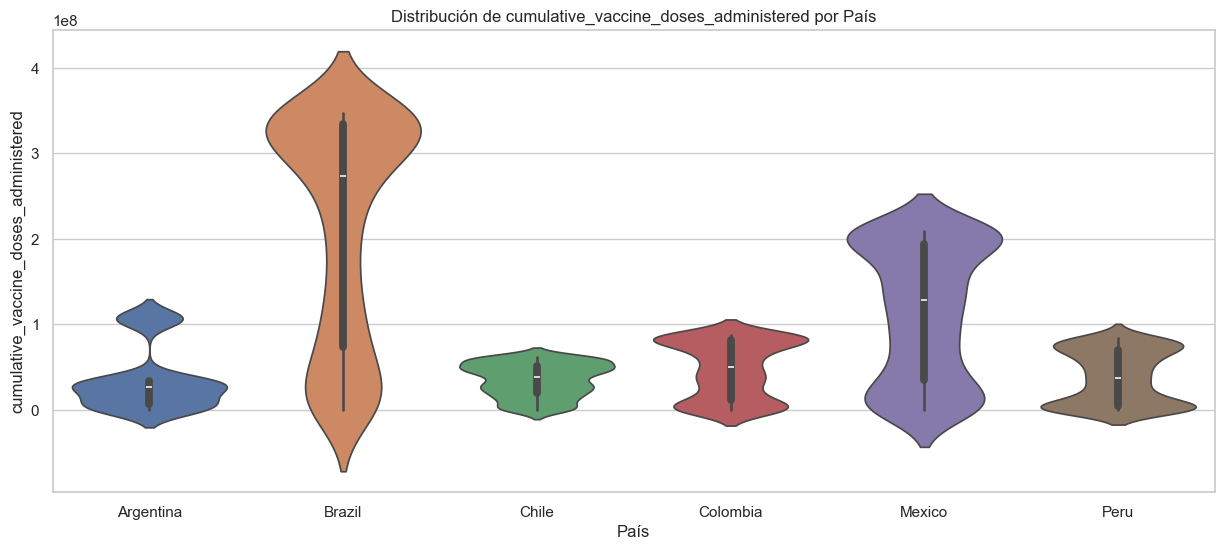

In [85]:
variables_interes = ['new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered']

for variable in variables_interes:
    plt.figure(figsize=(15, 6))
    sns.violinplot(data=datos_paises_interes, x='country_name', y=variable, hue='country_name')
    plt.title(f'Distribución de {variable} por País')
    plt.xlabel('País')
    plt.ylabel(variable)
    plt.show()

### Se crean diagramas de barra para mostrar la relevancia de prevalencia de fumar y diabetes frente al Covid

In [86]:
# Crear variables normalizadas por población
datos_paises_interes['new_confirmed_per_capita'] = datos_paises_interes['new_confirmed'] / datos_paises_interes['population']
datos_paises_interes['new_deceased_per_capita'] = datos_paises_interes['new_deceased'] / datos_paises_interes['population']

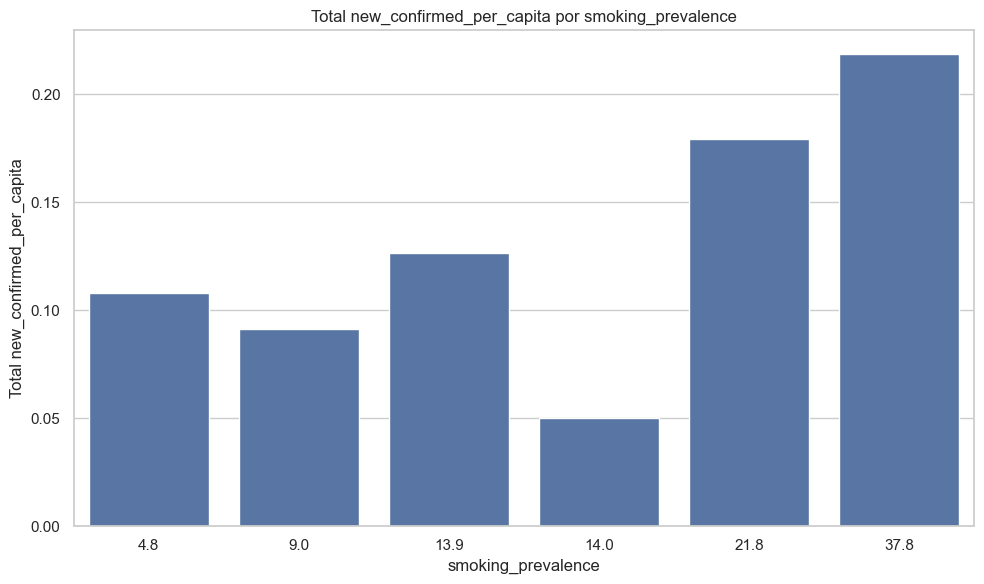

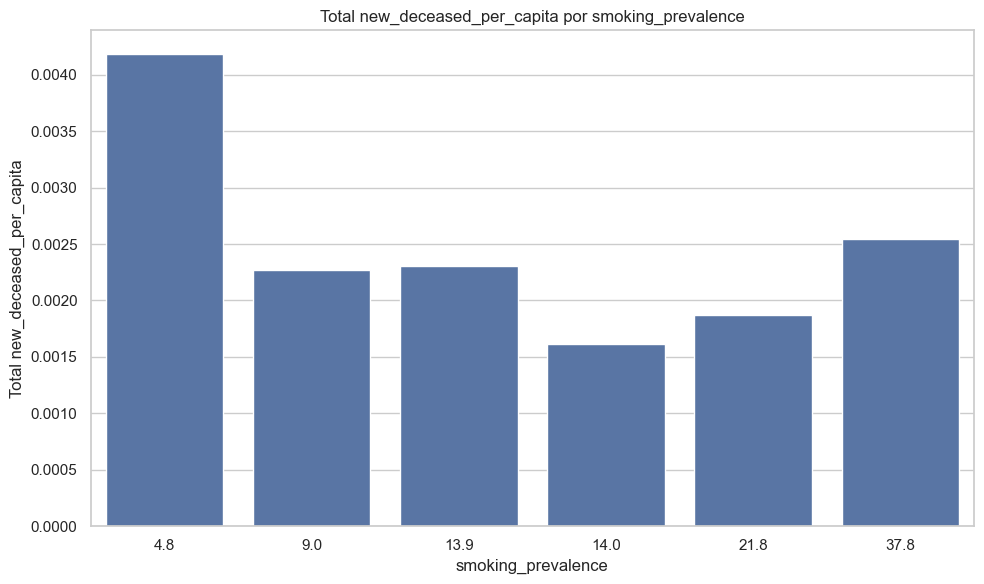

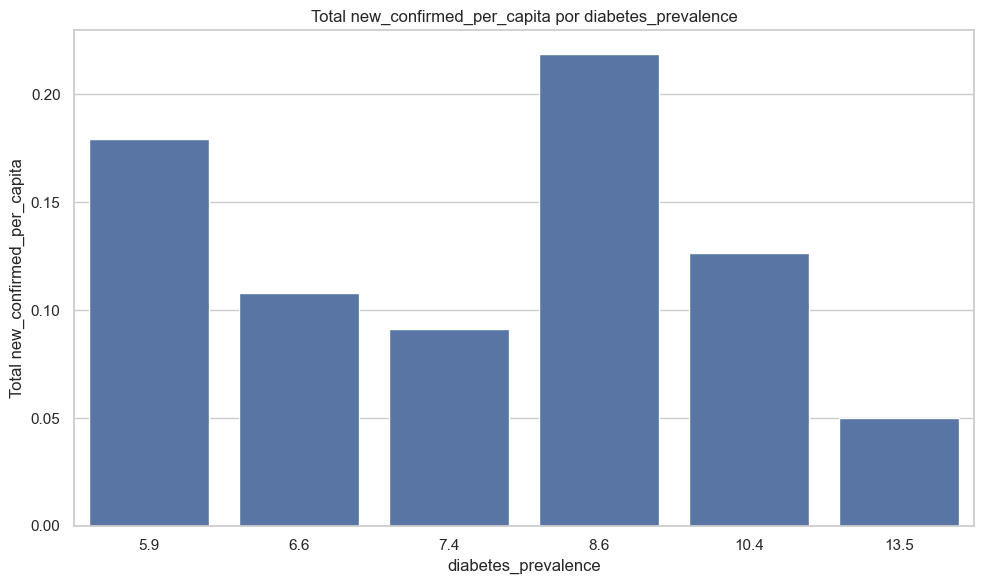

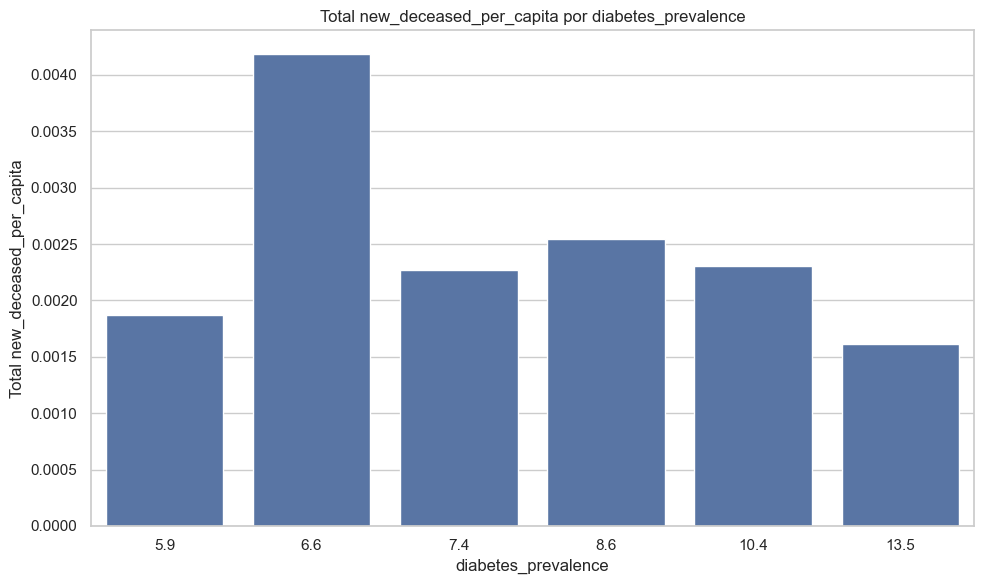

In [87]:
combinaciones = [
    ('smoking_prevalence', 'new_confirmed_per_capita'),
    ('smoking_prevalence', 'new_deceased_per_capita'),
    ('diabetes_prevalence', 'new_confirmed_per_capita'),
    ('diabetes_prevalence', 'new_deceased_per_capita')
]

for x_var, y_var in combinaciones:
    datos_agrupados = datos_paises_interes.groupby(x_var)[y_var].sum().reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(data=datos_agrupados, x=x_var, y=y_var)
    plt.xlabel(x_var)
    plt.ylabel(f"Total {y_var}")
    plt.title(f"Total {y_var} por {x_var}")
    plt.tight_layout()
    plt.show()


- Estos gráficos de dispersión permiten visualizar si los países con mayor
prevalencia de tabaquismo o diabetes tienden a tener tasas más altas de casos o muertes per cápita.
- Es probable que no se observe una correlación lineal perfecta, ya que muchos otros factores influyen.
- Los puntos representan a cada país, y su posición puede indicar si hay una tendencia.
Por ejemplo, un país con alta prevalencia de tabaquismo y también alta tasa de casos per cápita
estaría en la parte superior derecha del gráfico.
Estos gráficos son valiosos para identificar posibles relaciones a nivel macro entre las condiciones
de salud preexistentes de la población y la severidad de la pandemia.

### Se crea un diagrama de barras para comparar la tasa de mortalidad masculina vs femenina

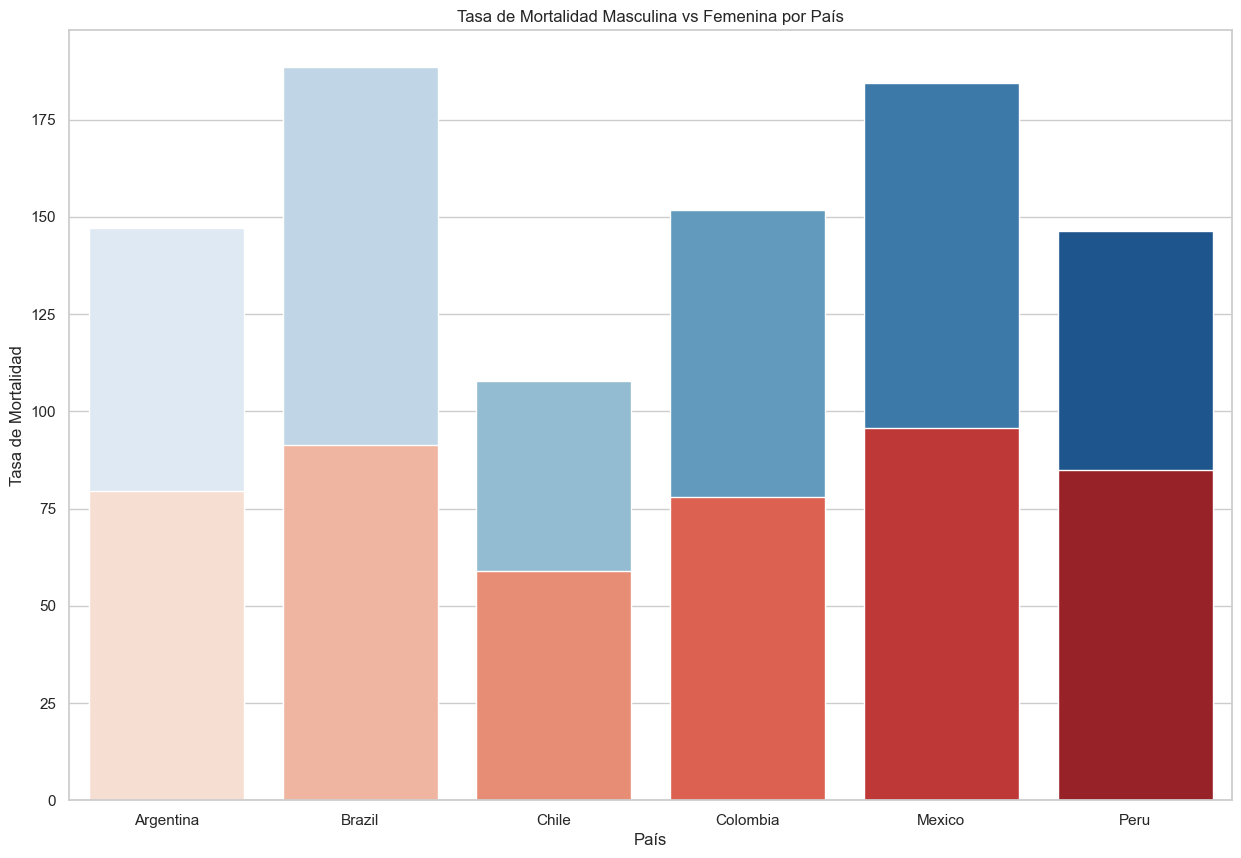

In [88]:
plt.figure(figsize=(15, 10))
sns.barplot(data=datos_paises_interes, x='country_name', y='adult_male_mortality_rate', hue='country_name', palette='Blues')
sns.barplot(data=datos_paises_interes, x='country_name', y='adult_female_mortality_rate', hue='country_name', palette='Reds')
plt.title('Tasa de Mortalidad Masculina vs Femenina por País')
plt.xlabel('País')
plt.ylabel('Tasa de Mortalidad')
plt.show()

### Se crea una matriz de correlación específica para las variables demográficas y de salud.

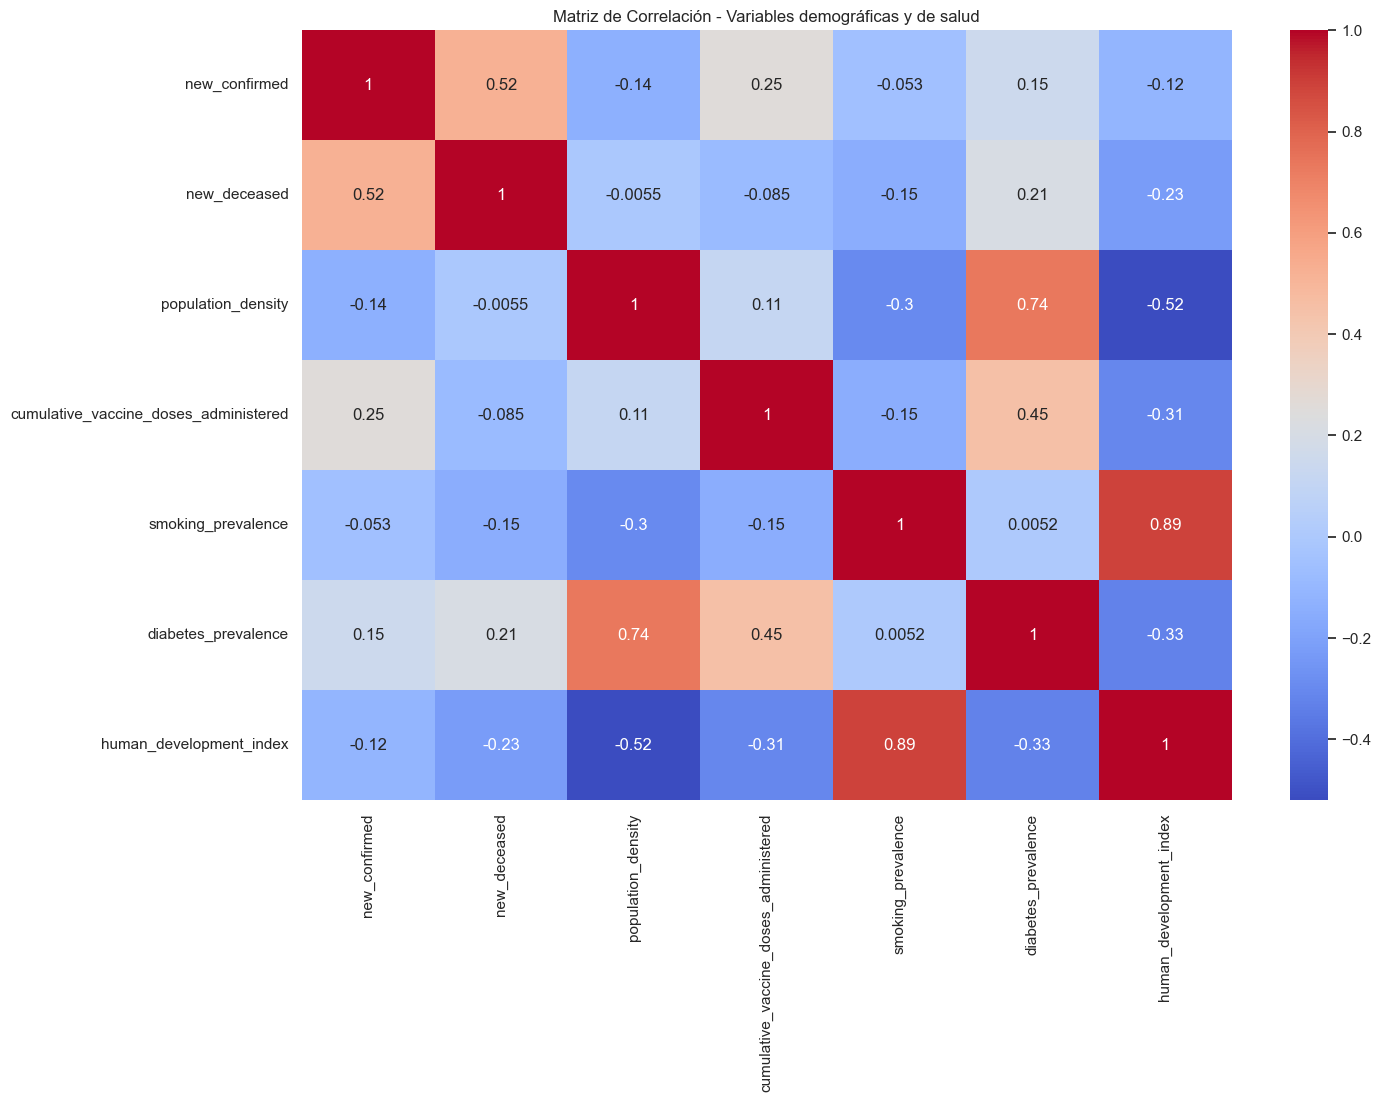

In [89]:
variables_interes = ['new_confirmed', 'new_deceased', 'population_density', 'cumulative_vaccine_doses_administered', 'smoking_prevalence', 'diabetes_prevalence', 'human_development_index']
matriz_correlacion = datos_paises_interes[variables_interes].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Variables demográficas y de salud')
plt.show()

- Esta matriz de correlación, calculada sobre datos agregados por país, revela cómo las características
estructurales de cada nación se relacionan con el impacto de la pandemia.
- Es probable que se observen correlaciones entre human_development_index y las tasas de casos/muertes
o vacunación. Un mayor IDH podría correlacionarse con una mayor capacidad de vacunación y,
potencialmente, menor mortalidad (aunque la relación no siempre es lineal).
- Las prevalencias de tabaquismo y diabetes pueden mostrar correlaciones con las tasas de mortalidad
per cápita, sugiriendo el impacto de las comorbilidades.
- La population_density podría correlacionarse con los casos per cápita, indicando la facilidad de propagación.
Este gráfico es fundamental para identificar factores de riesgo y protección a nivel de país
que podrían influir en la estrategia de expansión de laboratorios.

### Avance 3: EDA con Numpy y Pandas


In [3]:
import geopandas as gpd



Se cambia el tipo de dato de la fecha para poder realizar los series temporales

In [9]:
datos_paises_interes['date'] = pd.to_datetime(datos_paises_interes['date'])

In [10]:
datos_paises_interes.head(10)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,0.000000,41.559285,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
1,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,0.000000,43.581350,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
2,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,13.144500,74.880846,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
3,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,1.498600,60.805923,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
4,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,8.286750,72.972595,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
5,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,5.108222,52.241997,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
6,AR,2021-01-07,AR,Argentina,13722.0,160.0,1731824.0,47453.0,42092.0,44938712.0,...,0.000000,39.691672,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
7,AR,2021-01-08,AR,Argentina,13932.0,162.0,1745756.0,47615.0,54090.0,44938712.0,...,3.265714,57.254261,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
8,AR,2021-01-09,AR,Argentina,9959.0,158.0,1755715.0,47773.0,58552.0,44938712.0,...,13.687778,61.715447,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
9,AR,2021-01-10,AR,Argentina,5174.0,165.0,1760889.0,47938.0,59043.0,44938712.0,...,0.000000,62.971625,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8


### Se crean grafícos con difrentes variables clave y temporalidades para ver la evolución del Covid 19 en el tiempo en los diferntes países de interes

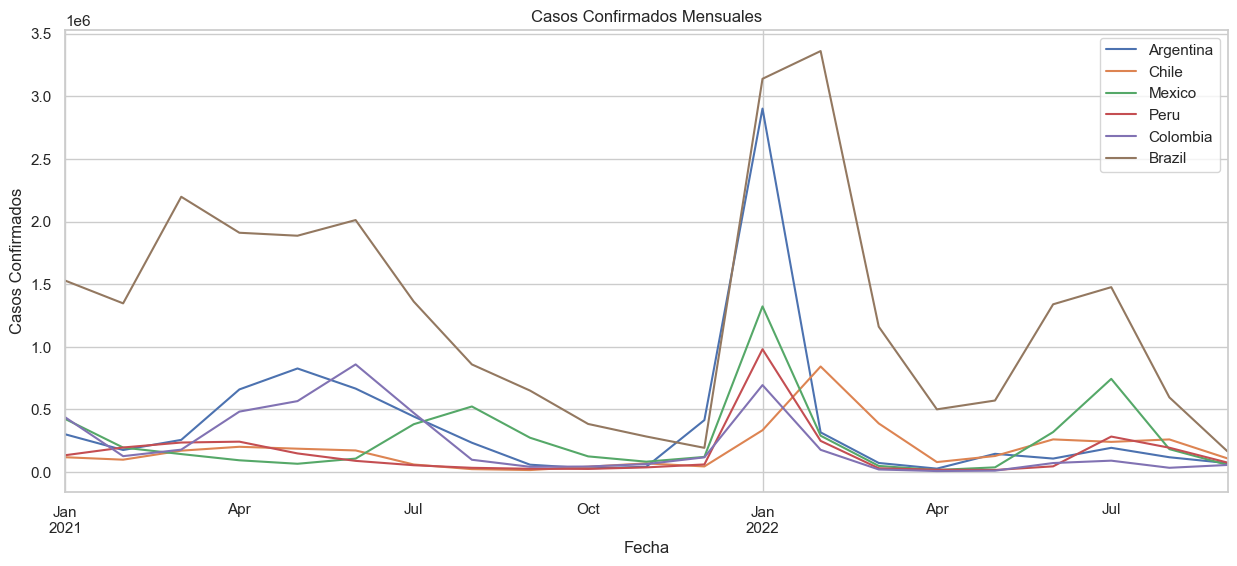

In [108]:
for pais in paises_interes:
    datos_paises_interes[datos_paises_interes['country_name'] == pais].set_index('date').resample('ME').sum(numeric_only=True)['new_confirmed'].plot(label=pais, figsize=(15, 6))
    plt.title('Casos Confirmados Mensuales')
    plt.xlabel('Fecha')
    plt.ylabel('Casos Confirmados')
    plt.legend()

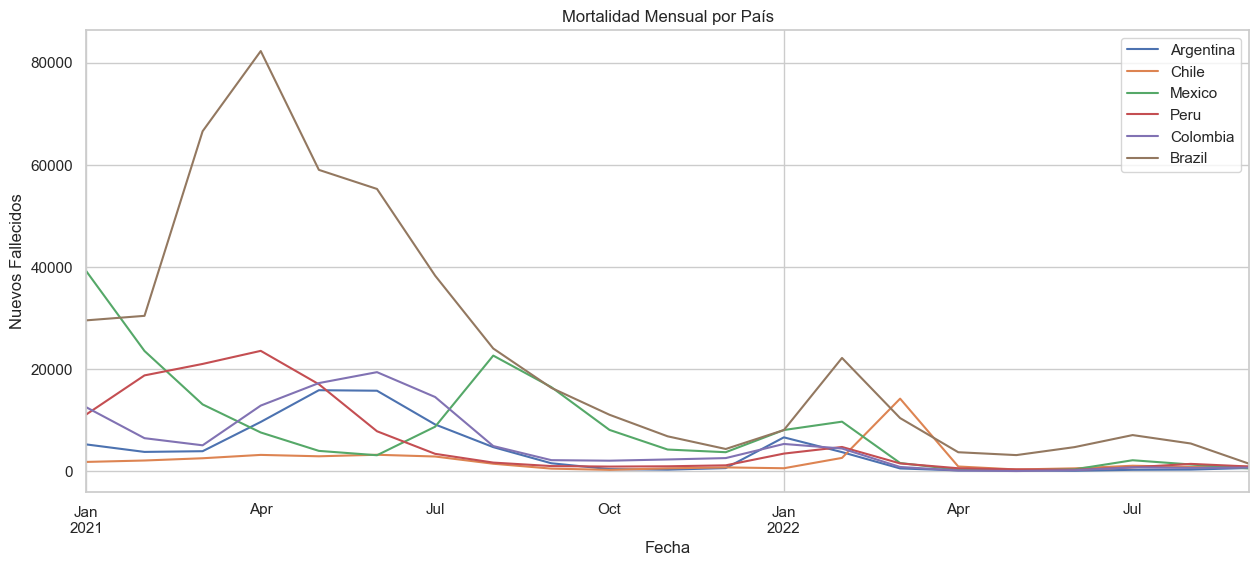

In [107]:
for pais in paises_interes:
    datos_paises_interes[datos_paises_interes['country_name'] == pais].set_index('date').resample('ME').sum(numeric_only=True)['new_deceased'].plot(label=pais, figsize=(15, 6))
    plt.title('Mortalidad Mensual por País')
    plt.legend()
    plt.xlabel('Fecha')
    plt.ylabel('Nuevos Fallecidos')

    

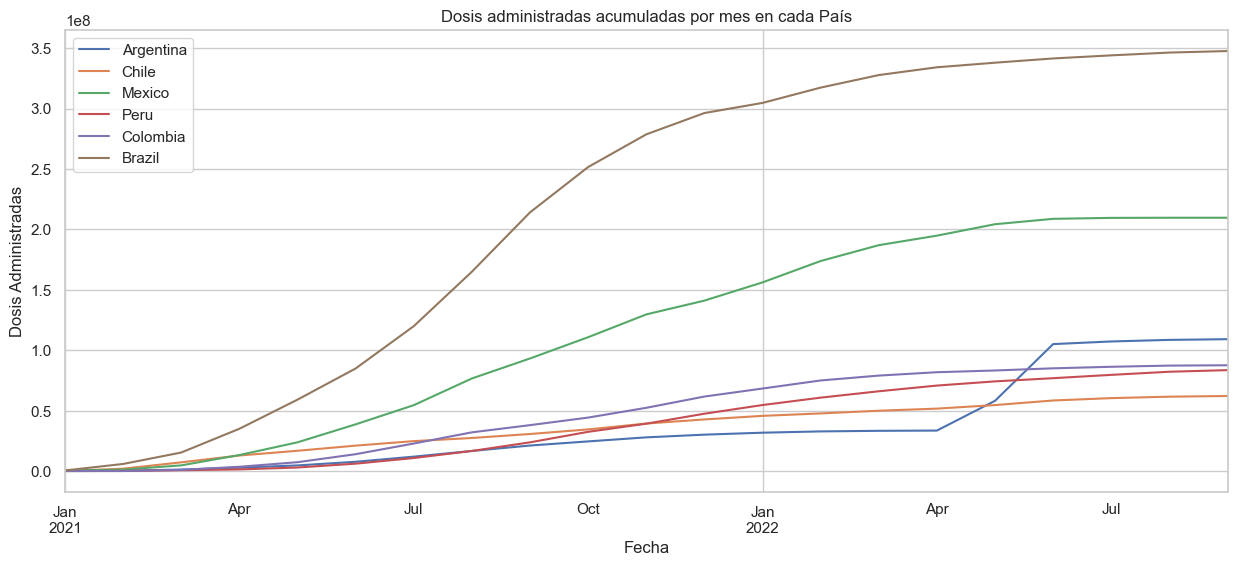

In [116]:
for pais in paises_interes:
    datos_paises_interes[datos_paises_interes['country_name'] == pais].set_index('date').resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(label=pais, figsize=(15, 6))
    plt.title('Dosis administradas acumuladas por mes en cada País')
    plt.legend()
    plt.xlabel('Fecha')
    plt.ylabel('Dosis Administradas')


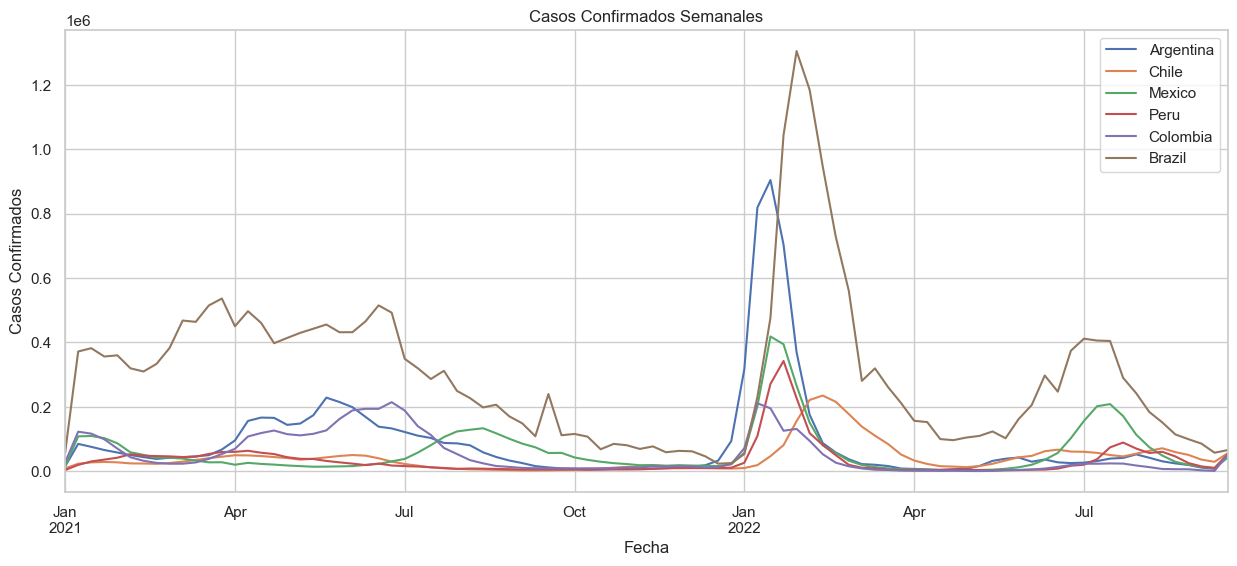

In [97]:
for pais in paises_interes:
    datos_paises_interes[datos_paises_interes['country_name'] == pais].set_index('date').resample('W').sum(numeric_only=True)['new_confirmed'].plot(label=pais, figsize=(15, 6))
    plt.title('Casos Confirmados Semanales')
    plt.xlabel('Fecha')
    plt.ylabel('Casos Confirmados')
    plt.legend()

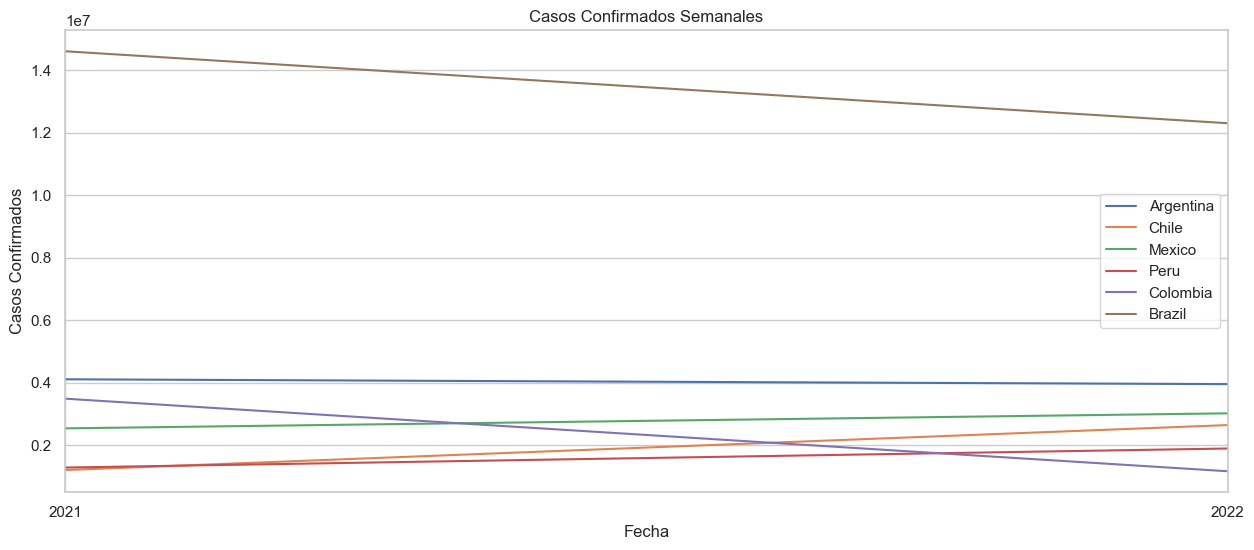

In [99]:
for pais in paises_interes:
    datos_paises_interes[datos_paises_interes['country_name'] == pais].set_index('date').resample('YE').sum(numeric_only=True)['new_confirmed'].plot(label=pais, figsize=(15, 6))
    plt.title('Casos Confirmados Semanales')
    plt.xlabel('Fecha')
    plt.ylabel('Casos Confirmados')
    plt.legend()

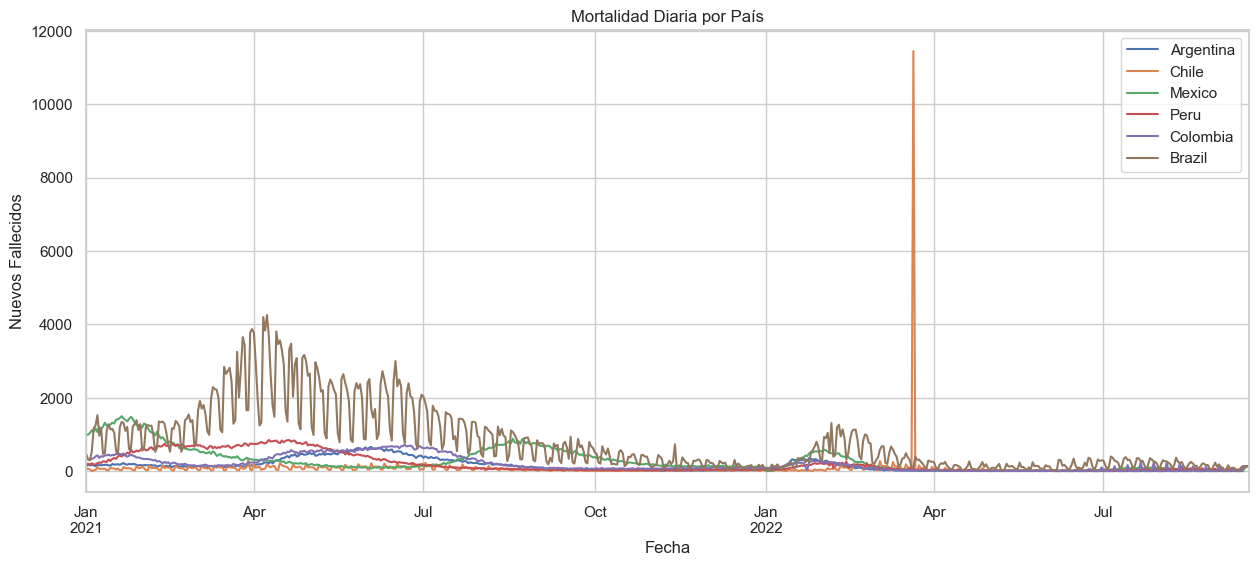

In [128]:
for pais in paises_interes:
    datos_paises_interes[datos_paises_interes['country_name'] == pais].set_index('date').resample('D').sum(numeric_only=True)['new_deceased'].plot(label=pais, figsize=(15, 6))
    plt.title('Mortalidad Diaria por País')
    plt.legend()
    plt.xlabel('Fecha')
    plt.ylabel('Nuevos Fallecidos')


- Estos gráficos de series temporales son fundamentales para visualizar las olas de la pandemia.
- Se pueden observar picos y valles en los casos confirmados a lo largo del tiempo para cada país.
- Cada país exhibe un patrón distinto de brotes, reflejando diferencias en políticas de salud,
densidad poblacional, y respuesta social.


### Se crea una gráfica de comparación de casos nuevos y vacunación para ver su incidencia. 

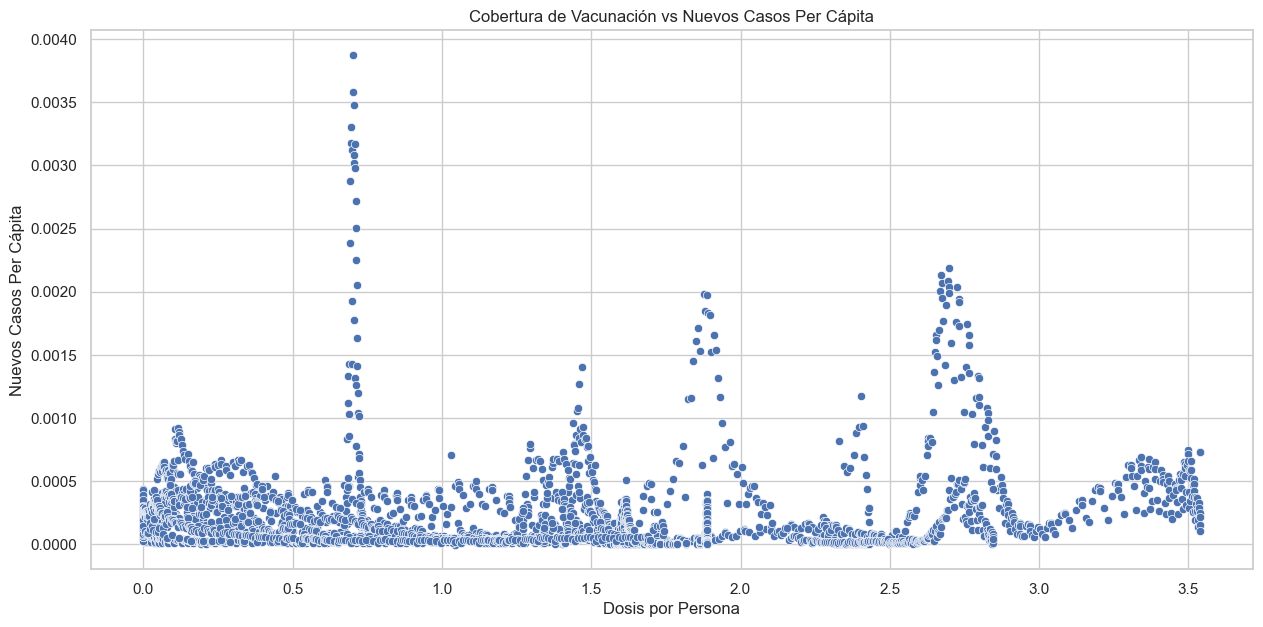

In [107]:
datos_paises_interes['vacunacion_per_capita'] = datos_paises_interes['cumulative_vaccine_doses_administered'] / datos_paises_interes['population']

plt.figure(figsize=(15, 7))
sns.scatterplot(data=datos_paises_interes, x='vacunacion_per_capita', y='new_confirmed_per_capita')
plt.title('Cobertura de Vacunación vs Nuevos Casos Per Cápita')
plt.xlabel('Dosis por Persona')
plt.ylabel('Nuevos Casos Per Cápita')
plt.show()

- Este gráfico muestraa la curva creciente de dosis de vacunas administradas en cada país.
- Se puede observar la velocidad del despliegue de la vacunación en las diferentes naciones.
- La forma de la curva (más empinada al principio, luego más aplanada) indica cómo avanzó la campaña.
- Países con un inicio más temprano y una pendiente más pronunciada tuvieron una vacunación más rápida.
Estos gráficos son fundamentales para entender el nivel de protección de la población
y la posible reducción de la severidad de los brotes.

### Se crea un diagrama de barras para analizar la distribución de las edades de la población en cada país

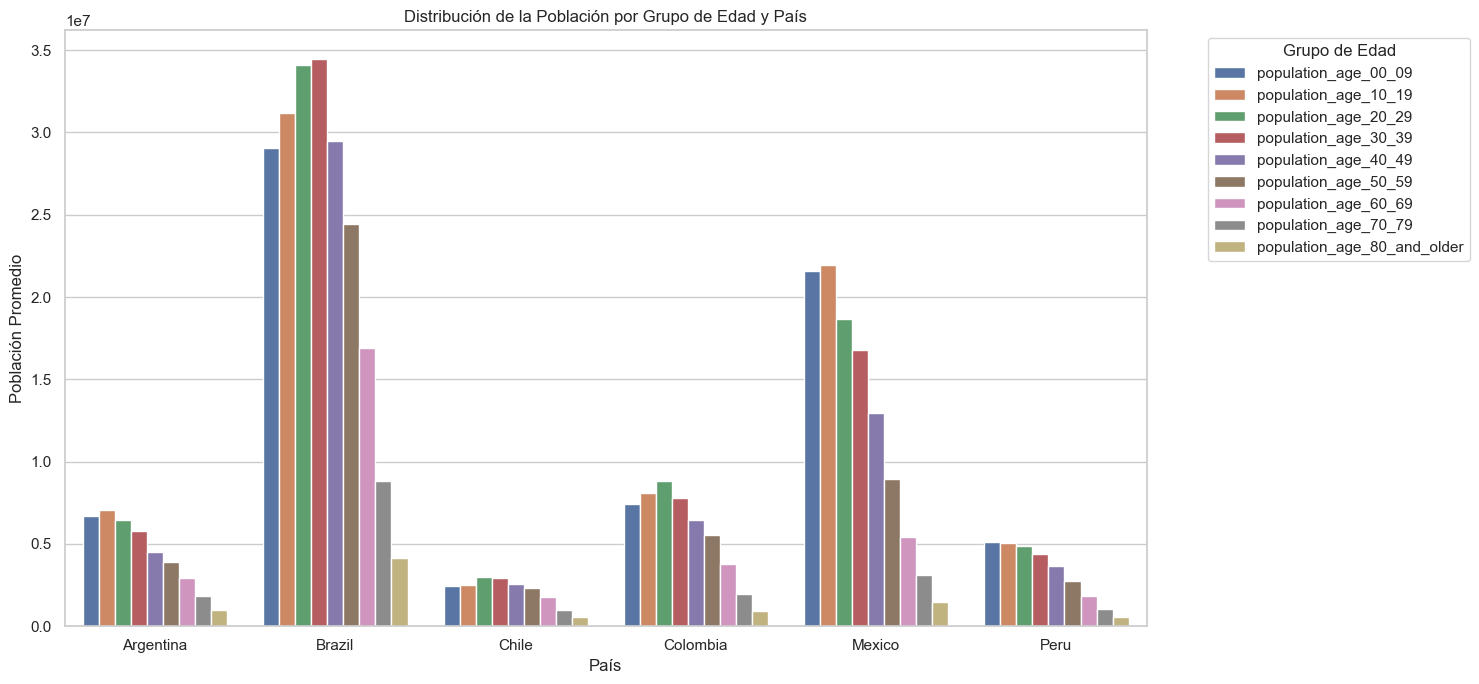

In [ ]:
variables_edades = ['population_age_00_09', 'population_age_10_19' , 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']


# Agrupar por país (usar promedio si hay varias fechas)
edades_por_pais = datos_paises_interes.groupby('country_name')[variables_edades].mean().reset_index()

# Convertir a formato largo
edades_long = edades_por_pais.melt(
    id_vars='country_name',
    value_vars=variables_edades,
    var_name='Grupo_Edad',
    value_name='Poblacion'
)


# Gráfico de barras agrupadas por país y grupo de edad
plt.figure(figsize=(15, 7))
sns.barplot(data=edades_long, x='country_name', y='Poblacion', hue='Grupo_Edad')
plt.title('Distribución de la Población por Grupo de Edad y País')
plt.xlabel('País')
plt.ylabel('Población Promedio')
plt.legend(title='Grupo de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Se crea un mapa que muestre el total de casos por país

In [ ]:
import geopandas as gpd

In [17]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")

In [20]:
datos_resumen = datos_paises_interes.groupby('country_name')['new_confirmed'].sum().reset_index()

world_merged = world.merge(
    datos_resumen,
    how='left',
    left_on='ADMIN',
    right_on='country_name'
)

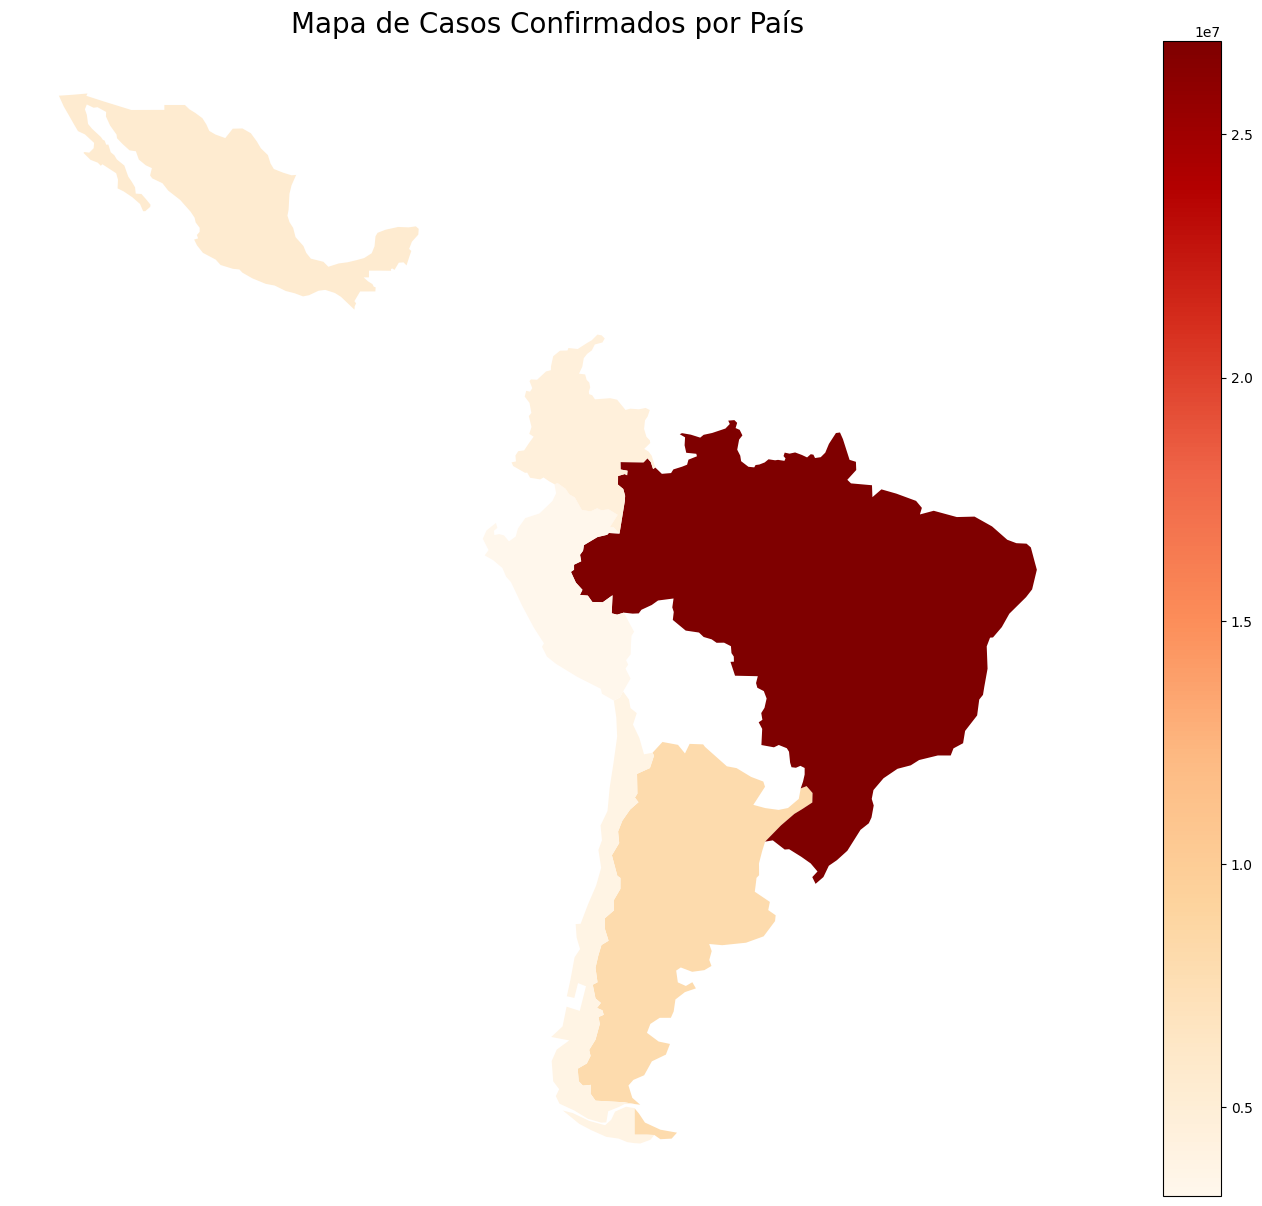

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))  


world_merged.plot(
    column='new_confirmed',
    cmap='OrRd',
    legend=True,
    ax=ax, 

)

ax.set_title('Mapa de Casos Confirmados por País', fontsize=20)
ax.axis('off')

plt.show()